In [1]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import  mnist
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
from keras import Sequential
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [2]:
data = tf.keras.datasets.cifar10
((X_train, y_train),
 (X_test, y_test)) = (data.load_data())

print(X_train.shape)

X_train = (X_train/255.0).astype('float32')
X_test = (X_test/255.0).astype('float32')

print(X_train.shape)

(50000, 32, 32, 3)


(50000, 32, 32, 3)


In [3]:
model = Sequential([
 layers.InputLayer(shape=(32, 32, 3)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(32, activation='relu'),
 layers.Dropout(0.2),
 layers.Dense(32, activation='relu'),
 layers.Dropout(0.2),
 layers.Dense(10, activation='linear')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          73,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,866 (444.79 KB)

 Trainable params: 113,866 (444.79 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

history = model.fit(
 X_train, y_train, epochs = 10
)

Epoch 1/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:17:36 3s/step - accuracy: 0.0312 - loss: 2.3570

   4/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.0801 - loss: 2.3241  

   7/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.0967 - loss: 2.3185

  11/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.1046 - loss: 2.3163

  15/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1058 - loss: 2.3146

  19/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.1060 - loss: 2.3131

  23/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.1056 - loss: 2.3118

  28/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.1053 - loss: 2.3104

  33/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.1047 - loss: 2.3093

  38/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.1036 - loss: 2.3086

  44/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.1030 - loss: 2.3077

  50/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.1023 - loss: 2.3070

  55/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.1019 - loss: 2.3063

  60/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.1016 - loss: 2.3057

  66/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.1015 - loss: 2.3049

  71/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.1017 - loss: 2.3042

  76/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.1019 - loss: 2.3036

  82/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.1022 - loss: 2.3029

  87/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.1025 - loss: 2.3023

  92/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.1028 - loss: 2.3018

  97/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1032 - loss: 2.3013

 102/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1036 - loss: 2.3007

 108/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1042 - loss: 2.3001

 113/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1046 - loss: 2.2994

 119/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1053 - loss: 2.2987

 124/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1058 - loss: 2.2980

 130/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.1064 - loss: 2.2972

 136/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.1069 - loss: 2.2963

 142/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.1075 - loss: 2.2954

 148/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.1080 - loss: 2.2944

 154/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.1086 - loss: 2.2934

 160/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.1093 - loss: 2.2923

 166/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.1100 - loss: 2.2913

 172/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.1107 - loss: 2.2902

 178/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.1114 - loss: 2.2891

 184/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.1120 - loss: 2.2881

 190/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.1127 - loss: 2.2870

 196/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.1134 - loss: 2.2858

 202/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.1141 - loss: 2.2847

 208/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.1147 - loss: 2.2836

 214/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.1153 - loss: 2.2825

 220/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.1160 - loss: 2.2814

 226/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1166 - loss: 2.2803

 232/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1172 - loss: 2.2792

 237/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1177 - loss: 2.2782

 243/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1183 - loss: 2.2771

 248/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1188 - loss: 2.2761

 253/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1193 - loss: 2.2751

 258/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1198 - loss: 2.2741

 264/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1204 - loss: 2.2729

 270/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1210 - loss: 2.2717

 275/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1215 - loss: 2.2707

 281/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1221 - loss: 2.2695

 287/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1227 - loss: 2.2682

 292/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1232 - loss: 2.2671

 298/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1238 - loss: 2.2658

 302/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.1243 - loss: 2.2648

 308/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1249 - loss: 2.2634

 313/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1254 - loss: 2.2623

 318/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1259 - loss: 2.2612

 323/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1264 - loss: 2.2600

 328/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1270 - loss: 2.2589

 334/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1276 - loss: 2.2575

 339/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1281 - loss: 2.2564

 344/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1286 - loss: 2.2552

 350/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1293 - loss: 2.2538

 356/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1299 - loss: 2.2524

 362/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1306 - loss: 2.2510

 368/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1312 - loss: 2.2496

 374/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1319 - loss: 2.2481

 379/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1324 - loss: 2.2470

 385/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1331 - loss: 2.2455

 391/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1337 - loss: 2.2441

 397/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1344 - loss: 2.2426

 402/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1349 - loss: 2.2414

 407/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1355 - loss: 2.2402

 412/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1360 - loss: 2.2390

 417/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1366 - loss: 2.2378

 423/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1372 - loss: 2.2363

 429/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1379 - loss: 2.2348

 435/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1385 - loss: 2.2333

 440/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1390 - loss: 2.2321

 446/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1397 - loss: 2.2306

 452/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1403 - loss: 2.2291

 458/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1410 - loss: 2.2277

 463/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1415 - loss: 2.2264

 469/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1421 - loss: 2.2249

 475/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1428 - loss: 2.2234

 480/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1433 - loss: 2.2222

 485/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.1438 - loss: 2.2209

 491/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1445 - loss: 2.2194

 496/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1450 - loss: 2.2182

 502/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1456 - loss: 2.2167

 508/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1463 - loss: 2.2152

 514/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1469 - loss: 2.2137

 520/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1475 - loss: 2.2123

 526/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1482 - loss: 2.2108

 532/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1488 - loss: 2.2093

 537/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1493 - loss: 2.2081

 543/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1500 - loss: 2.2066

 549/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1506 - loss: 2.2051

 555/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1513 - loss: 2.2037

 561/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1519 - loss: 2.2022

 566/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1524 - loss: 2.2010

 571/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1529 - loss: 2.1998

 577/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1536 - loss: 2.1983

 583/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1542 - loss: 2.1968 

 589/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1548 - loss: 2.1954

 595/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1554 - loss: 2.1940

 601/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1561 - loss: 2.1925

 607/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1567 - loss: 2.1911

 613/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1573 - loss: 2.1897

 618/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1578 - loss: 2.1885

 624/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1584 - loss: 2.1870

 629/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1589 - loss: 2.1858

 635/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1595 - loss: 2.1844

 641/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1601 - loss: 2.1830

 647/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1607 - loss: 2.1816

 653/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1613 - loss: 2.1802

 659/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1619 - loss: 2.1788

 665/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1625 - loss: 2.1774

 670/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1630 - loss: 2.1762

 675/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1635 - loss: 2.1751

 680/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1639 - loss: 2.1739

 685/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1644 - loss: 2.1728

 691/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1650 - loss: 2.1715

 696/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1655 - loss: 2.1703

 702/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1661 - loss: 2.1690

 707/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1665 - loss: 2.1679

 713/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1671 - loss: 2.1665

 719/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1677 - loss: 2.1652

 725/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1682 - loss: 2.1639

 730/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1687 - loss: 2.1627

 735/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1692 - loss: 2.1616

 741/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1697 - loss: 2.1603

 747/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1703 - loss: 2.1590

 753/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1708 - loss: 2.1577

 759/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1714 - loss: 2.1564

 764/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1718 - loss: 2.1553

 770/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1723 - loss: 2.1540

 776/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1729 - loss: 2.1527

 782/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1734 - loss: 2.1514

 787/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1739 - loss: 2.1504

 793/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1744 - loss: 2.1491

 799/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1750 - loss: 2.1478

 805/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1755 - loss: 2.1466

 811/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1760 - loss: 2.1453

 817/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1766 - loss: 2.1440

 823/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1771 - loss: 2.1428

 829/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1776 - loss: 2.1415

 834/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1780 - loss: 2.1405

 840/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1785 - loss: 2.1393

 846/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1791 - loss: 2.1380

 852/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1796 - loss: 2.1368

 858/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1801 - loss: 2.1356

 864/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1806 - loss: 2.1344

 870/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1811 - loss: 2.1332

 875/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1815 - loss: 2.1322

 881/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1820 - loss: 2.1310

 886/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1824 - loss: 2.1300

 892/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1829 - loss: 2.1288

 898/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1833 - loss: 2.1276

 904/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1838 - loss: 2.1264

 910/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1843 - loss: 2.1253

 916/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1848 - loss: 2.1241

 922/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1853 - loss: 2.1229

 928/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1857 - loss: 2.1218

 934/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1862 - loss: 2.1206

 940/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1867 - loss: 2.1195

 946/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1872 - loss: 2.1183

 952/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1876 - loss: 2.1172

 957/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1880 - loss: 2.1162

 962/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1884 - loss: 2.1153

 968/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1889 - loss: 2.1141

 974/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1894 - loss: 2.1130

 980/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1898 - loss: 2.1119

 986/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1903 - loss: 2.1108

 992/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1907 - loss: 2.1096

 998/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1912 - loss: 2.1085

1004/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1916 - loss: 2.1074

1009/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1920 - loss: 2.1065

1015/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1925 - loss: 2.1054

1021/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1929 - loss: 2.1043

1027/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1934 - loss: 2.1032

1033/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1938 - loss: 2.1021

1039/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1943 - loss: 2.1011

1044/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1946 - loss: 2.1002

1050/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1951 - loss: 2.0991

1056/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1955 - loss: 2.0980

1062/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1960 - loss: 2.0969

1068/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1964 - loss: 2.0958

1074/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1969 - loss: 2.0948

1079/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1972 - loss: 2.0939

1085/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1977 - loss: 2.0928

1090/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1980 - loss: 2.0920

1096/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1984 - loss: 2.0909

1101/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1988 - loss: 2.0900

1107/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1992 - loss: 2.0890

1112/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1996 - loss: 2.0881

1118/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2000 - loss: 2.0871

1123/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2004 - loss: 2.0863

1129/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2008 - loss: 2.0852

1135/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2012 - loss: 2.0842

1141/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2016 - loss: 2.0832

1147/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2020 - loss: 2.0822

1152/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2024 - loss: 2.0814

1158/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2028 - loss: 2.0804

1164/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2032 - loss: 2.0794

1169/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2036 - loss: 2.0785

1175/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2040 - loss: 2.0775

1181/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2044 - loss: 2.0766

1187/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2048 - loss: 2.0756

1193/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2052 - loss: 2.0746

1199/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2056 - loss: 2.0737

1205/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2060 - loss: 2.0727

1211/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2063 - loss: 2.0717

1217/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2067 - loss: 2.0708

1223/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2071 - loss: 2.0699

1229/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2075 - loss: 2.0689

1235/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2079 - loss: 2.0680

1241/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2083 - loss: 2.0670

1247/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2087 - loss: 2.0661

1253/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2091 - loss: 2.0652

1259/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2094 - loss: 2.0643

1265/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2098 - loss: 2.0633

1270/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2101 - loss: 2.0626

1276/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2105 - loss: 2.0617

1282/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2109 - loss: 2.0608

1288/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2113 - loss: 2.0598

1293/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2116 - loss: 2.0591

1299/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2119 - loss: 2.0582

1305/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2123 - loss: 2.0573

1311/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2127 - loss: 2.0564

1317/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2130 - loss: 2.0555

1322/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2133 - loss: 2.0548

1328/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2137 - loss: 2.0539

1334/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2141 - loss: 2.0530

1340/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2144 - loss: 2.0521

1345/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2147 - loss: 2.0514

1350/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2150 - loss: 2.0507

1356/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2154 - loss: 2.0498

1362/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2158 - loss: 2.0489

1368/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2161 - loss: 2.0480

1374/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2165 - loss: 2.0472

1380/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2168 - loss: 2.0463

1385/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2171 - loss: 2.0456

1391/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2175 - loss: 2.0447

1397/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2178 - loss: 2.0439

1403/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2182 - loss: 2.0430

1409/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2185 - loss: 2.0422

1415/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2189 - loss: 2.0413

1420/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2192 - loss: 2.0406

1426/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2195 - loss: 2.0398

1432/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2199 - loss: 2.0389

1438/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2202 - loss: 2.0381

1444/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2205 - loss: 2.0373

1449/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2208 - loss: 2.0366

1455/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2212 - loss: 2.0358

1461/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2215 - loss: 2.0349

1467/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2219 - loss: 2.0341

1473/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2222 - loss: 2.0333

1478/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2225 - loss: 2.0326

1484/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2228 - loss: 2.0318

1489/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2231 - loss: 2.0311

1495/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2234 - loss: 2.0303

1501/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2238 - loss: 2.0295

1506/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2240 - loss: 2.0289

1512/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2244 - loss: 2.0281

1517/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2246 - loss: 2.0274

1522/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2249 - loss: 2.0267

1528/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2252 - loss: 2.0260

1534/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2256 - loss: 2.0252

1540/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2259 - loss: 2.0244

1545/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2262 - loss: 2.0237

1550/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2264 - loss: 2.0231

1555/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2267 - loss: 2.0224

1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2270 - loss: 2.0218

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.2272 - loss: 2.0213


Epoch 2/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:18 50ms/step - accuracy: 0.4688 - loss: 1.4113

   6/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4095 - loss: 1.5422 

  12/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4212 - loss: 1.5255

  18/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4309 - loss: 1.5136

  24/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4347 - loss: 1.5084

  30/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4356 - loss: 1.5075

  35/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4352 - loss: 1.5087

  41/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4346 - loss: 1.5110

  47/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4341 - loss: 1.5130

  53/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4334 - loss: 1.5153

  59/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4330 - loss: 1.5171

  65/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4326 - loss: 1.5190

  71/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4324 - loss: 1.5207

  77/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4321 - loss: 1.5223

  83/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4317 - loss: 1.5240

  89/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4312 - loss: 1.5256

  95/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4307 - loss: 1.5273

 101/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4304 - loss: 1.5286

 107/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4301 - loss: 1.5300

 113/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4298 - loss: 1.5314

 119/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4294 - loss: 1.5328

 125/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4291 - loss: 1.5338

 131/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4289 - loss: 1.5345

 137/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4286 - loss: 1.5352

 143/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4283 - loss: 1.5359

 148/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4281 - loss: 1.5364

 154/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4278 - loss: 1.5371

 160/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4275 - loss: 1.5375

 166/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4272 - loss: 1.5378

 172/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4271 - loss: 1.5380

 178/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4269 - loss: 1.5382

 184/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4268 - loss: 1.5384

 190/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4267 - loss: 1.5386

 195/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4265 - loss: 1.5387

 201/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4264 - loss: 1.5388

 206/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4264 - loss: 1.5389

 212/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4262 - loss: 1.5391

 218/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4261 - loss: 1.5394

 224/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4260 - loss: 1.5396

 230/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4259 - loss: 1.5398

 236/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4258 - loss: 1.5400

 242/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4257 - loss: 1.5401

 248/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4256 - loss: 1.5403

 254/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4256 - loss: 1.5405

 260/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4255 - loss: 1.5406

 266/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4255 - loss: 1.5406

 272/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4255 - loss: 1.5406

 277/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4255 - loss: 1.5407

 283/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4255 - loss: 1.5408

 289/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4254 - loss: 1.5408

 295/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4254 - loss: 1.5409

 301/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4254 - loss: 1.5410

 306/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4254 - loss: 1.5411

 312/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4254 - loss: 1.5411

 318/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4254 - loss: 1.5412

 324/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4254 - loss: 1.5412

 330/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4254 - loss: 1.5413

 336/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4253 - loss: 1.5414

 342/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4253 - loss: 1.5414

 347/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4254 - loss: 1.5415

 353/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4254 - loss: 1.5415

 359/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4254 - loss: 1.5414

 365/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4255 - loss: 1.5414

 371/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4255 - loss: 1.5414

 377/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4255 - loss: 1.5414

 383/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4255 - loss: 1.5414

 388/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4255 - loss: 1.5414

 394/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4255 - loss: 1.5415

 400/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4255 - loss: 1.5415

 406/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4256 - loss: 1.5414

 412/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4256 - loss: 1.5414

 417/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4256 - loss: 1.5413

 422/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4256 - loss: 1.5413

 427/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4256 - loss: 1.5412

 431/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4256 - loss: 1.5412

 436/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4256 - loss: 1.5411

 441/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4256 - loss: 1.5411

 447/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4257 - loss: 1.5410

 452/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4257 - loss: 1.5409

 457/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4257 - loss: 1.5408

 462/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4257 - loss: 1.5408

 468/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4258 - loss: 1.5407

 474/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4258 - loss: 1.5406

 479/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4258 - loss: 1.5405

 485/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4258 - loss: 1.5404

 490/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4259 - loss: 1.5403

 495/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4259 - loss: 1.5402

 500/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4259 - loss: 1.5402

 505/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4259 - loss: 1.5401

 510/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4259 - loss: 1.5400

 515/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4259 - loss: 1.5400

 521/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4259 - loss: 1.5399

 527/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4260 - loss: 1.5398

 532/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4260 - loss: 1.5397

 538/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4260 - loss: 1.5396

 544/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4260 - loss: 1.5395 

 550/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4260 - loss: 1.5394

 555/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4260 - loss: 1.5394

 561/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4260 - loss: 1.5393

 567/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4260 - loss: 1.5392

 573/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4260 - loss: 1.5392

 579/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4261 - loss: 1.5391

 585/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4261 - loss: 1.5390

 591/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4261 - loss: 1.5389

 597/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4261 - loss: 1.5388

 603/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4261 - loss: 1.5387

 609/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4261 - loss: 1.5386

 615/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4261 - loss: 1.5385

 621/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4261 - loss: 1.5385

 626/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4262 - loss: 1.5384

 632/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4262 - loss: 1.5383

 638/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4262 - loss: 1.5382

 644/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4262 - loss: 1.5381

 650/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4262 - loss: 1.5380

 656/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4262 - loss: 1.5379

 662/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4263 - loss: 1.5378

 668/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4263 - loss: 1.5377

 674/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4263 - loss: 1.5376

 679/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4263 - loss: 1.5375

 685/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4263 - loss: 1.5375

 691/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4263 - loss: 1.5374

 697/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4264 - loss: 1.5373

 703/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4264 - loss: 1.5372

 709/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4264 - loss: 1.5371

 715/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4264 - loss: 1.5370

 721/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4264 - loss: 1.5370

 727/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4264 - loss: 1.5369

 733/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4264 - loss: 1.5368

 738/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4264 - loss: 1.5368

 744/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5367

 750/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5366

 756/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5366

 762/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5365

 768/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5365

 774/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5364

 780/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5364

 785/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5363

 791/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5363

 797/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5362

 803/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4265 - loss: 1.5362

 808/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4266 - loss: 1.5361

 814/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4266 - loss: 1.5361

 820/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4266 - loss: 1.5360

 826/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4266 - loss: 1.5359

 832/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4266 - loss: 1.5359

 838/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4267 - loss: 1.5358

 843/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4267 - loss: 1.5357

 849/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4267 - loss: 1.5356

 855/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4267 - loss: 1.5356

 860/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4267 - loss: 1.5355

 865/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4268 - loss: 1.5355

 870/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4268 - loss: 1.5354

 875/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4268 - loss: 1.5353

 880/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4268 - loss: 1.5353

 886/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4268 - loss: 1.5352

 892/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4269 - loss: 1.5351

 898/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4269 - loss: 1.5350

 904/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4269 - loss: 1.5349

 910/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4270 - loss: 1.5349

 916/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4270 - loss: 1.5348

 922/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4270 - loss: 1.5347

 928/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4270 - loss: 1.5346

 933/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4271 - loss: 1.5345

 939/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4271 - loss: 1.5345

 944/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4271 - loss: 1.5344

 950/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4272 - loss: 1.5343

 956/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4272 - loss: 1.5342

 962/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4272 - loss: 1.5341

 968/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4273 - loss: 1.5340

 974/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4273 - loss: 1.5339

 980/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4273 - loss: 1.5338

 986/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4274 - loss: 1.5337

 992/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4274 - loss: 1.5336

 997/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4275 - loss: 1.5335

1003/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4275 - loss: 1.5335

1009/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4275 - loss: 1.5334

1015/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4276 - loss: 1.5333

1021/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4276 - loss: 1.5332

1027/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4277 - loss: 1.5331

1033/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4277 - loss: 1.5330

1039/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4278 - loss: 1.5328

1045/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4278 - loss: 1.5327

1051/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4278 - loss: 1.5326

1056/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4279 - loss: 1.5326

1061/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4279 - loss: 1.5325

1066/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4279 - loss: 1.5324

1072/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4280 - loss: 1.5323

1078/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4280 - loss: 1.5322

1084/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4281 - loss: 1.5321

1090/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4281 - loss: 1.5320

1095/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4281 - loss: 1.5319

1101/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4282 - loss: 1.5318

1107/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4282 - loss: 1.5317

1113/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4283 - loss: 1.5316

1119/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4283 - loss: 1.5315

1125/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4283 - loss: 1.5314

1130/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4284 - loss: 1.5313

1136/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4284 - loss: 1.5312

1142/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4285 - loss: 1.5311

1148/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4285 - loss: 1.5310

1154/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4286 - loss: 1.5309

1160/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4286 - loss: 1.5308

1165/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4286 - loss: 1.5307

1170/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4287 - loss: 1.5307

1176/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4287 - loss: 1.5306

1182/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4288 - loss: 1.5305

1188/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4288 - loss: 1.5304

1193/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4288 - loss: 1.5303

1199/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4289 - loss: 1.5302

1205/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4289 - loss: 1.5301

1211/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4290 - loss: 1.5300

1216/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4290 - loss: 1.5299

1222/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4290 - loss: 1.5298

1228/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4291 - loss: 1.5297

1234/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4291 - loss: 1.5296

1239/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4292 - loss: 1.5295

1245/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4292 - loss: 1.5294

1251/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4293 - loss: 1.5293

1257/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4293 - loss: 1.5292

1263/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4294 - loss: 1.5291

1269/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4294 - loss: 1.5290

1275/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4295 - loss: 1.5289

1281/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4295 - loss: 1.5288

1287/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4296 - loss: 1.5287

1292/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4296 - loss: 1.5286

1297/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4296 - loss: 1.5286

1302/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4297 - loss: 1.5285

1308/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4297 - loss: 1.5284

1313/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4298 - loss: 1.5283

1319/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4298 - loss: 1.5282

1325/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4299 - loss: 1.5281

1331/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4299 - loss: 1.5280

1336/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4300 - loss: 1.5279

1342/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4300 - loss: 1.5278

1347/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4300 - loss: 1.5277

1353/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4301 - loss: 1.5276

1359/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4301 - loss: 1.5275

1365/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4302 - loss: 1.5274

1371/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4302 - loss: 1.5273

1377/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4303 - loss: 1.5272

1383/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4303 - loss: 1.5271

1388/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4304 - loss: 1.5270

1394/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4304 - loss: 1.5269

1399/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4305 - loss: 1.5268

1405/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4305 - loss: 1.5267

1411/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4306 - loss: 1.5266

1417/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4306 - loss: 1.5265

1423/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4307 - loss: 1.5264

1429/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4307 - loss: 1.5263

1435/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4308 - loss: 1.5262

1441/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4308 - loss: 1.5262

1447/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4309 - loss: 1.5261

1453/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4309 - loss: 1.5260

1459/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4310 - loss: 1.5259

1465/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4310 - loss: 1.5258

1471/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4311 - loss: 1.5257

1476/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4311 - loss: 1.5256

1482/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4312 - loss: 1.5255

1488/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4312 - loss: 1.5254

1494/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4313 - loss: 1.5253

1499/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4313 - loss: 1.5252

1505/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4313 - loss: 1.5251

1511/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4314 - loss: 1.5250

1517/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4314 - loss: 1.5249

1523/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4315 - loss: 1.5248

1529/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4315 - loss: 1.5247

1535/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4316 - loss: 1.5246

1541/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4316 - loss: 1.5245

1547/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4317 - loss: 1.5244

1553/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4317 - loss: 1.5243

1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4318 - loss: 1.5242

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4318 - loss: 1.5241


Epoch 3/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:17 50ms/step - accuracy: 0.4688 - loss: 1.5224

   6/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4458 - loss: 1.5559 

  12/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4354 - loss: 1.5326

  18/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4423 - loss: 1.5081

  24/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4470 - loss: 1.4969

  30/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4512 - loss: 1.4875

  36/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4531 - loss: 1.4814

  42/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4557 - loss: 1.4748

  48/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4578 - loss: 1.4698

  53/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4594 - loss: 1.4655

  59/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4614 - loss: 1.4611

  65/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4631 - loss: 1.4578

  71/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4643 - loss: 1.4548

  77/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4654 - loss: 1.4523

  83/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4662 - loss: 1.4508

  89/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4670 - loss: 1.4494

  95/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4677 - loss: 1.4481

 101/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4684 - loss: 1.4470

 107/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4689 - loss: 1.4463

 112/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4694 - loss: 1.4455

 118/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4700 - loss: 1.4445

 124/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4705 - loss: 1.4436

 130/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4708 - loss: 1.4429

 136/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4712 - loss: 1.4422

 142/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4715 - loss: 1.4417

 148/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4718 - loss: 1.4413

 154/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4721 - loss: 1.4410

 160/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4724 - loss: 1.4407

 166/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4727 - loss: 1.4402

 171/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4728 - loss: 1.4399

 176/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4729 - loss: 1.4397

 181/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4730 - loss: 1.4395

 186/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4731 - loss: 1.4394

 191/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4731 - loss: 1.4393

 196/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4730 - loss: 1.4392

 202/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4730 - loss: 1.4392

 208/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4730 - loss: 1.4391

 213/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4730 - loss: 1.4391

 219/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4729 - loss: 1.4390

 225/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4729 - loss: 1.4389

 231/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4730 - loss: 1.4388

 237/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4730 - loss: 1.4386

 243/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4730 - loss: 1.4385

 248/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4730 - loss: 1.4384

 254/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4731 - loss: 1.4382

 260/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4731 - loss: 1.4380

 266/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4731 - loss: 1.4379

 272/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4732 - loss: 1.4377

 278/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4732 - loss: 1.4376

 284/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4732 - loss: 1.4376

 289/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4732 - loss: 1.4375

 295/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4732 - loss: 1.4375

 300/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4733 - loss: 1.4374

 306/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4733 - loss: 1.4372

 311/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4734 - loss: 1.4371

 317/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4734 - loss: 1.4370

 323/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4734 - loss: 1.4369

 329/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4735 - loss: 1.4367

 335/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4735 - loss: 1.4366

 340/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4735 - loss: 1.4365

 346/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4735 - loss: 1.4364

 352/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4736 - loss: 1.4363

 358/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4736 - loss: 1.4362

 363/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4736 - loss: 1.4362

 368/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4737 - loss: 1.4361

 373/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4737 - loss: 1.4360

 378/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4738 - loss: 1.4359

 384/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4738 - loss: 1.4358

 389/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4739 - loss: 1.4357

 395/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4740 - loss: 1.4356

 401/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4740 - loss: 1.4355

 407/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4741 - loss: 1.4353

 411/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4742 - loss: 1.4352

 416/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4743 - loss: 1.4350

 421/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4744 - loss: 1.4348

 427/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4746 - loss: 1.4346

 433/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4747 - loss: 1.4344

 438/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4748 - loss: 1.4343

 443/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4749 - loss: 1.4341

 449/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4751 - loss: 1.4338

 454/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4752 - loss: 1.4337

 460/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4753 - loss: 1.4334

 466/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4754 - loss: 1.4332

 471/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4755 - loss: 1.4330

 477/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4756 - loss: 1.4328

 483/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4758 - loss: 1.4326

 489/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4759 - loss: 1.4324

 495/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4760 - loss: 1.4322

 501/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4761 - loss: 1.4319

 507/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4762 - loss: 1.4317

 513/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4763 - loss: 1.4315

 518/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4764 - loss: 1.4313

 524/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4765 - loss: 1.4310

 530/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4766 - loss: 1.4308

 536/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4767 - loss: 1.4306

 541/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4767 - loss: 1.4304

 547/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4768 - loss: 1.4302 

 553/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4769 - loss: 1.4300

 558/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4770 - loss: 1.4298

 564/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4771 - loss: 1.4296

 570/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4771 - loss: 1.4295

 576/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4772 - loss: 1.4293

 582/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4773 - loss: 1.4291

 588/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4774 - loss: 1.4289

 593/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4775 - loss: 1.4288

 599/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4775 - loss: 1.4286

 604/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4776 - loss: 1.4285

 610/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4777 - loss: 1.4283

 615/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4777 - loss: 1.4282

 620/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4778 - loss: 1.4280

 625/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4778 - loss: 1.4279

 631/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4779 - loss: 1.4278

 637/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4779 - loss: 1.4276

 642/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4780 - loss: 1.4275

 647/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4781 - loss: 1.4274

 653/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4781 - loss: 1.4272

 659/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4782 - loss: 1.4270

 665/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4782 - loss: 1.4269

 671/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4783 - loss: 1.4267

 677/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4784 - loss: 1.4265

 683/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4784 - loss: 1.4264

 688/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4785 - loss: 1.4262

 694/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4785 - loss: 1.4260

 699/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4786 - loss: 1.4259

 705/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4786 - loss: 1.4257

 711/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4787 - loss: 1.4256

 717/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4788 - loss: 1.4254

 723/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4788 - loss: 1.4253

 729/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4789 - loss: 1.4251

 735/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4789 - loss: 1.4250

 741/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4790 - loss: 1.4248

 747/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4790 - loss: 1.4247

 753/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4791 - loss: 1.4246

 759/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4791 - loss: 1.4244

 765/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4792 - loss: 1.4243

 771/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4793 - loss: 1.4242

 776/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4793 - loss: 1.4240

 782/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4793 - loss: 1.4239

 788/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4794 - loss: 1.4238

 794/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4795 - loss: 1.4237

 799/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4795 - loss: 1.4236

 805/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4795 - loss: 1.4234

 811/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4796 - loss: 1.4233

 817/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4796 - loss: 1.4232

 822/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4797 - loss: 1.4231

 828/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4797 - loss: 1.4230

 834/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4798 - loss: 1.4229

 839/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4798 - loss: 1.4228

 845/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4799 - loss: 1.4227

 851/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4799 - loss: 1.4226

 856/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4800 - loss: 1.4225

 862/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4800 - loss: 1.4224

 868/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4801 - loss: 1.4222

 874/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4801 - loss: 1.4221

 880/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4802 - loss: 1.4220

 886/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4802 - loss: 1.4219

 892/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4803 - loss: 1.4217

 898/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4803 - loss: 1.4216

 904/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4804 - loss: 1.4215

 910/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4804 - loss: 1.4214

 916/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4805 - loss: 1.4212

 922/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4805 - loss: 1.4211

 928/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4806 - loss: 1.4210

 933/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4806 - loss: 1.4209

 939/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4807 - loss: 1.4207

 945/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4807 - loss: 1.4206

 951/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4808 - loss: 1.4205

 957/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4808 - loss: 1.4204

 963/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4809 - loss: 1.4203

 969/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4809 - loss: 1.4201

 974/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4809 - loss: 1.4201

 979/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4810 - loss: 1.4200

 984/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4810 - loss: 1.4199

 990/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4810 - loss: 1.4198

 995/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4811 - loss: 1.4197

1001/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4811 - loss: 1.4196

1007/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4812 - loss: 1.4195

1013/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4812 - loss: 1.4194

1019/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4812 - loss: 1.4193

1025/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4813 - loss: 1.4192

1031/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4813 - loss: 1.4191

1037/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4814 - loss: 1.4190

1043/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4814 - loss: 1.4189

1048/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4814 - loss: 1.4188

1054/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4815 - loss: 1.4187

1059/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4815 - loss: 1.4186

1064/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4816 - loss: 1.4185

1070/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4816 - loss: 1.4184

1075/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4816 - loss: 1.4183

1081/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4817 - loss: 1.4183

1087/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4817 - loss: 1.4182

1093/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4817 - loss: 1.4181

1099/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4818 - loss: 1.4180

1105/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4818 - loss: 1.4179

1111/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4818 - loss: 1.4178

1117/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4819 - loss: 1.4177

1123/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4819 - loss: 1.4176

1129/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4819 - loss: 1.4175

1134/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4820 - loss: 1.4175

1140/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4820 - loss: 1.4174

1146/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4820 - loss: 1.4173

1152/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4821 - loss: 1.4172

1157/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4821 - loss: 1.4171

1163/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4821 - loss: 1.4170

1169/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4821 - loss: 1.4169

1175/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4822 - loss: 1.4168

1181/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4822 - loss: 1.4167

1187/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4823 - loss: 1.4167

1193/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4823 - loss: 1.4166

1199/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4823 - loss: 1.4165

1205/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4824 - loss: 1.4164

1211/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4824 - loss: 1.4163

1217/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4824 - loss: 1.4162

1223/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4825 - loss: 1.4161

1228/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4825 - loss: 1.4160

1234/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4825 - loss: 1.4159

1240/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4826 - loss: 1.4158

1246/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4826 - loss: 1.4158

1252/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4827 - loss: 1.4157

1258/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4827 - loss: 1.4156

1264/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4827 - loss: 1.4155

1270/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4828 - loss: 1.4154

1276/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4828 - loss: 1.4153

1281/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4828 - loss: 1.4152

1287/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4829 - loss: 1.4151

1292/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4829 - loss: 1.4150

1298/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4829 - loss: 1.4149

1304/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4830 - loss: 1.4148

1310/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4830 - loss: 1.4147

1316/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4831 - loss: 1.4146

1322/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4831 - loss: 1.4145

1328/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4831 - loss: 1.4144

1334/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4832 - loss: 1.4144

1340/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4832 - loss: 1.4143

1345/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4832 - loss: 1.4142

1350/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4833 - loss: 1.4141

1356/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4833 - loss: 1.4140

1362/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4833 - loss: 1.4139

1368/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4834 - loss: 1.4138

1374/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4834 - loss: 1.4137

1380/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4834 - loss: 1.4136

1386/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4835 - loss: 1.4135

1392/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4835 - loss: 1.4135

1398/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4836 - loss: 1.4134

1404/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4836 - loss: 1.4133

1410/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4836 - loss: 1.4132

1416/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4837 - loss: 1.4131

1421/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4837 - loss: 1.4130

1427/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4837 - loss: 1.4129

1433/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4838 - loss: 1.4128

1439/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4838 - loss: 1.4127

1445/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4838 - loss: 1.4127

1450/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4838 - loss: 1.4126

1454/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4839 - loss: 1.4125

1459/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4839 - loss: 1.4124

1465/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4839 - loss: 1.4123

1471/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4840 - loss: 1.4123

1477/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4840 - loss: 1.4122

1482/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4840 - loss: 1.4121

1487/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4841 - loss: 1.4120

1492/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4841 - loss: 1.4119

1498/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4841 - loss: 1.4118

1504/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4842 - loss: 1.4117

1509/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4842 - loss: 1.4117

1515/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4842 - loss: 1.4116

1521/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4843 - loss: 1.4115

1527/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4843 - loss: 1.4114

1532/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4843 - loss: 1.4113

1538/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4844 - loss: 1.4112

1543/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4844 - loss: 1.4111

1548/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4844 - loss: 1.4111

1553/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4844 - loss: 1.4110

1558/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4845 - loss: 1.4109

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4845 - loss: 1.4108

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4845 - loss: 1.4108


Epoch 4/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:08 44ms/step - accuracy: 0.6250 - loss: 1.1773

   7/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5061 - loss: 1.2724  

  12/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5044 - loss: 1.2832

  18/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5049 - loss: 1.2907

  24/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5056 - loss: 1.2944

  30/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5079 - loss: 1.2947

  36/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5107 - loss: 1.2928

  41/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5118 - loss: 1.2932

  47/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5126 - loss: 1.2946

  52/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5128 - loss: 1.2963

  58/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5127 - loss: 1.2990

  63/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5124 - loss: 1.3010

  69/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5122 - loss: 1.3033

  75/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5119 - loss: 1.3050

  81/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5116 - loss: 1.3066

  87/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5116 - loss: 1.3074

  93/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5118 - loss: 1.3081

  99/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5120 - loss: 1.3089

 105/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5124 - loss: 1.3097

 111/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5126 - loss: 1.3105

 117/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5129 - loss: 1.3114

 123/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5130 - loss: 1.3126

 129/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5131 - loss: 1.3139

 135/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5131 - loss: 1.3153

 141/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5130 - loss: 1.3168

 147/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5129 - loss: 1.3182

 153/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5128 - loss: 1.3195

 159/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5129 - loss: 1.3206

 165/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5128 - loss: 1.3215

 171/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5128 - loss: 1.3225

 177/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5128 - loss: 1.3233

 183/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5127 - loss: 1.3239

 189/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5125 - loss: 1.3247

 195/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5123 - loss: 1.3255

 201/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5122 - loss: 1.3261

 207/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5120 - loss: 1.3267

 213/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5118 - loss: 1.3273

 219/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5117 - loss: 1.3279

 225/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5116 - loss: 1.3283

 230/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5115 - loss: 1.3285

 236/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5114 - loss: 1.3288

 241/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5114 - loss: 1.3289

 247/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5113 - loss: 1.3291

 252/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5113 - loss: 1.3293

 257/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5112 - loss: 1.3294

 262/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5112 - loss: 1.3296

 268/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5112 - loss: 1.3298

 273/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5112 - loss: 1.3299

 279/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5111 - loss: 1.3300

 285/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5111 - loss: 1.3301

 291/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5111 - loss: 1.3303

 297/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5112 - loss: 1.3304

 303/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5112 - loss: 1.3304

 309/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5112 - loss: 1.3304

 315/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5113 - loss: 1.3304

 320/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5114 - loss: 1.3303

 325/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5114 - loss: 1.3303

 331/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5115 - loss: 1.3304

 336/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5115 - loss: 1.3305

 342/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5116 - loss: 1.3305

 347/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5116 - loss: 1.3306

 352/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5117 - loss: 1.3307

 357/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5117 - loss: 1.3308

 363/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5117 - loss: 1.3309

 368/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5118 - loss: 1.3310

 374/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5118 - loss: 1.3310

 380/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5119 - loss: 1.3311

 386/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5119 - loss: 1.3311

 391/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5120 - loss: 1.3311

 397/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5120 - loss: 1.3312

 403/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5121 - loss: 1.3312

 409/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5121 - loss: 1.3313

 415/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5122 - loss: 1.3313

 421/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5123 - loss: 1.3313

 427/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5124 - loss: 1.3313

 433/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5124 - loss: 1.3313

 439/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5125 - loss: 1.3313

 443/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5125 - loss: 1.3313

 448/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5126 - loss: 1.3313

 454/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5127 - loss: 1.3313

 460/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5127 - loss: 1.3312

 465/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5128 - loss: 1.3312

 471/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5128 - loss: 1.3313

 477/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5129 - loss: 1.3313

 483/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5129 - loss: 1.3313

 489/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5129 - loss: 1.3313

 495/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5130 - loss: 1.3313

 500/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5130 - loss: 1.3313

 506/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5130 - loss: 1.3313

 512/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5131 - loss: 1.3313

 518/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5131 - loss: 1.3312

 523/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5131 - loss: 1.3312

 529/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5132 - loss: 1.3312

 534/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5132 - loss: 1.3312

 540/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5132 - loss: 1.3312 

 546/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5132 - loss: 1.3312

 552/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5133 - loss: 1.3312

 557/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5133 - loss: 1.3311

 563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5134 - loss: 1.3311

 569/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5134 - loss: 1.3311

 575/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5135 - loss: 1.3310

 581/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5135 - loss: 1.3310

 586/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5135 - loss: 1.3310

 592/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5136 - loss: 1.3309

 598/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5136 - loss: 1.3309

 604/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5137 - loss: 1.3308

 610/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5137 - loss: 1.3308

 616/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5138 - loss: 1.3307

 622/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5138 - loss: 1.3307

 628/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5139 - loss: 1.3307

 634/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5139 - loss: 1.3306

 639/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5139 - loss: 1.3306

 644/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5140 - loss: 1.3306

 649/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5140 - loss: 1.3305

 655/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5141 - loss: 1.3305

 661/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5141 - loss: 1.3305

 667/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5141 - loss: 1.3304

 673/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5142 - loss: 1.3304

 679/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5142 - loss: 1.3304

 685/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5143 - loss: 1.3303

 690/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5143 - loss: 1.3303

 695/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5143 - loss: 1.3303

 700/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5143 - loss: 1.3302

 705/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5144 - loss: 1.3302

 711/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5144 - loss: 1.3301

 717/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5144 - loss: 1.3301

 722/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5145 - loss: 1.3301

 727/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5145 - loss: 1.3300

 732/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5145 - loss: 1.3300

 738/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5146 - loss: 1.3300

 744/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5146 - loss: 1.3299

 750/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5146 - loss: 1.3299

 756/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5147 - loss: 1.3299

 761/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5147 - loss: 1.3299

 766/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5147 - loss: 1.3298

 771/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5147 - loss: 1.3298

 776/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5148 - loss: 1.3298

 781/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5148 - loss: 1.3298

 787/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5148 - loss: 1.3297

 792/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5148 - loss: 1.3297

 797/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5149 - loss: 1.3297

 802/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5149 - loss: 1.3297

 806/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5149 - loss: 1.3296

 811/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5149 - loss: 1.3296

 817/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5150 - loss: 1.3296

 823/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5150 - loss: 1.3295

 828/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5150 - loss: 1.3295

 834/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5150 - loss: 1.3295

 839/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5151 - loss: 1.3294

 845/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5151 - loss: 1.3294

 850/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5151 - loss: 1.3294

 856/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5152 - loss: 1.3293

 861/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5152 - loss: 1.3293

 867/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5152 - loss: 1.3292

 873/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5153 - loss: 1.3292

 879/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5153 - loss: 1.3292

 885/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5153 - loss: 1.3291

 891/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5154 - loss: 1.3291

 896/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5154 - loss: 1.3290

 902/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5154 - loss: 1.3290

 908/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5155 - loss: 1.3290

 913/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5155 - loss: 1.3289

 919/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5155 - loss: 1.3289

 924/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5156 - loss: 1.3289

 929/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5156 - loss: 1.3288

 935/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5156 - loss: 1.3288

 940/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5156 - loss: 1.3288

 945/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5156 - loss: 1.3288

 951/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5157 - loss: 1.3287

 957/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5157 - loss: 1.3287

 963/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5157 - loss: 1.3287

 969/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5157 - loss: 1.3287

 975/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5158 - loss: 1.3286

 981/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5158 - loss: 1.3286

 987/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5158 - loss: 1.3286

 993/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5158 - loss: 1.3286

 999/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5159 - loss: 1.3285

1005/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5159 - loss: 1.3285

1011/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5159 - loss: 1.3285

1016/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5159 - loss: 1.3285

1022/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5160 - loss: 1.3284

1028/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5160 - loss: 1.3284

1034/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5160 - loss: 1.3284

1039/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5160 - loss: 1.3284

1044/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5161 - loss: 1.3283

1050/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5161 - loss: 1.3283

1056/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5161 - loss: 1.3283

1062/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5161 - loss: 1.3283

1068/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5162 - loss: 1.3282

1074/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5162 - loss: 1.3282

1079/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5162 - loss: 1.3282

1084/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5162 - loss: 1.3282

1089/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5163 - loss: 1.3281

1094/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5163 - loss: 1.3281

1099/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5163 - loss: 1.3281

1104/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5163 - loss: 1.3281

1109/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5163 - loss: 1.3281

1115/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5164 - loss: 1.3280

1121/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5164 - loss: 1.3280

1126/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5164 - loss: 1.3280

1131/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5164 - loss: 1.3280

1136/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5164 - loss: 1.3279

1141/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5165 - loss: 1.3279

1147/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5165 - loss: 1.3279

1153/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5165 - loss: 1.3279

1159/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5165 - loss: 1.3278

1164/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5166 - loss: 1.3278

1170/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5166 - loss: 1.3278

1176/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5166 - loss: 1.3278

1182/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5166 - loss: 1.3278

1188/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5167 - loss: 1.3277

1194/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5167 - loss: 1.3277

1199/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5167 - loss: 1.3277

1204/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5167 - loss: 1.3277

1209/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5167 - loss: 1.3276

1214/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5168 - loss: 1.3276

1219/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5168 - loss: 1.3276

1224/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5168 - loss: 1.3276

1229/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5168 - loss: 1.3276

1234/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5168 - loss: 1.3275

1240/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5169 - loss: 1.3275

1245/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5169 - loss: 1.3275

1251/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5169 - loss: 1.3275

1257/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5169 - loss: 1.3274

1263/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5170 - loss: 1.3274

1269/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5170 - loss: 1.3274

1275/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5170 - loss: 1.3274

1281/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5170 - loss: 1.3273

1287/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5170 - loss: 1.3273

1292/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5171 - loss: 1.3273

1298/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5171 - loss: 1.3273

1304/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5171 - loss: 1.3272

1310/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5171 - loss: 1.3272

1315/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5172 - loss: 1.3272

1321/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5172 - loss: 1.3271

1327/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5172 - loss: 1.3271

1333/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5172 - loss: 1.3271

1339/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5172 - loss: 1.3271

1344/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5173 - loss: 1.3270

1350/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5173 - loss: 1.3270

1356/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5173 - loss: 1.3270

1362/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5173 - loss: 1.3269

1368/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5174 - loss: 1.3269

1374/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5174 - loss: 1.3269

1379/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5174 - loss: 1.3269

1385/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5174 - loss: 1.3268

1391/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5174 - loss: 1.3268

1397/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5175 - loss: 1.3268

1402/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5175 - loss: 1.3267

1408/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5175 - loss: 1.3267

1414/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5175 - loss: 1.3267

1420/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5176 - loss: 1.3266

1426/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5176 - loss: 1.3266

1432/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5176 - loss: 1.3266

1438/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5176 - loss: 1.3266

1444/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5177 - loss: 1.3265

1450/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5177 - loss: 1.3265

1456/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5177 - loss: 1.3265

1462/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5177 - loss: 1.3265

1468/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5177 - loss: 1.3264

1474/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5178 - loss: 1.3264

1480/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5178 - loss: 1.3264

1486/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5178 - loss: 1.3264

1492/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5178 - loss: 1.3263

1498/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5178 - loss: 1.3263

1504/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5179 - loss: 1.3263

1510/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5179 - loss: 1.3263

1516/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5179 - loss: 1.3263

1522/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5179 - loss: 1.3262

1528/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5179 - loss: 1.3262

1534/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5180 - loss: 1.3262

1540/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5180 - loss: 1.3262

1546/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5180 - loss: 1.3261

1552/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5180 - loss: 1.3261

1557/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5180 - loss: 1.3261

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5181 - loss: 1.3261

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5181 - loss: 1.3261


Epoch 5/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:13 47ms/step - accuracy: 0.6250 - loss: 1.1930

   5/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5738 - loss: 1.3142 

  10/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.5606 - loss: 1.3068

  15/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5515 - loss: 1.3024

  20/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5476 - loss: 1.2993

  25/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5449 - loss: 1.2983

  30/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.5428 - loss: 1.2996

  36/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5421 - loss: 1.2978

  42/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5411 - loss: 1.2970

  48/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5397 - loss: 1.2976

  54/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5389 - loss: 1.2974

  60/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5385 - loss: 1.2968

  65/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5381 - loss: 1.2972

  71/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5380 - loss: 1.2968

  77/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5380 - loss: 1.2962

  83/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5380 - loss: 1.2960

  88/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5381 - loss: 1.2958

  94/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5380 - loss: 1.2955

  99/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5379 - loss: 1.2953

 104/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5379 - loss: 1.2950

 110/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5377 - loss: 1.2947

 116/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5375 - loss: 1.2943

 121/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5374 - loss: 1.2938

 127/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5374 - loss: 1.2930

 132/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5374 - loss: 1.2926

 138/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5373 - loss: 1.2921

 144/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5372 - loss: 1.2917

 150/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5370 - loss: 1.2916

 155/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5369 - loss: 1.2914

 161/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5368 - loss: 1.2912

 166/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5367 - loss: 1.2911

 171/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5366 - loss: 1.2909

 176/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5365 - loss: 1.2907

 182/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5364 - loss: 1.2907

 188/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5363 - loss: 1.2906

 194/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5363 - loss: 1.2906

 200/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5362 - loss: 1.2905

 206/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5362 - loss: 1.2903

 211/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5361 - loss: 1.2902

 216/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5361 - loss: 1.2901

 221/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5361 - loss: 1.2900

 227/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5361 - loss: 1.2898

 232/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5360 - loss: 1.2897

 238/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5360 - loss: 1.2895

 244/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5360 - loss: 1.2892

 250/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5360 - loss: 1.2890

 256/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5359 - loss: 1.2888

 262/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5359 - loss: 1.2886

 268/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5358 - loss: 1.2884

 274/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5358 - loss: 1.2882

 279/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5358 - loss: 1.2881

 285/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5358 - loss: 1.2879

 291/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5359 - loss: 1.2877

 297/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5359 - loss: 1.2875

 303/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5359 - loss: 1.2873

 309/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5359 - loss: 1.2871

 315/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5360 - loss: 1.2869

 321/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5360 - loss: 1.2867

 327/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5360 - loss: 1.2866

 333/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5360 - loss: 1.2864

 338/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5360 - loss: 1.2863

 344/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5361 - loss: 1.2861

 350/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5361 - loss: 1.2859

 356/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5361 - loss: 1.2858

 361/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5362 - loss: 1.2856

 367/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5362 - loss: 1.2855

 373/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5362 - loss: 1.2853

 379/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5362 - loss: 1.2851

 384/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5363 - loss: 1.2850

 390/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5363 - loss: 1.2849

 396/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5363 - loss: 1.2847

 402/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5363 - loss: 1.2846

 408/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5363 - loss: 1.2844

 413/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5364 - loss: 1.2843

 419/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5364 - loss: 1.2842

 425/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5364 - loss: 1.2840

 431/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5364 - loss: 1.2839

 437/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5364 - loss: 1.2837

 443/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5365 - loss: 1.2836

 449/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5364 - loss: 1.2835

 455/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5364 - loss: 1.2834

 461/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5364 - loss: 1.2834

 467/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5364 - loss: 1.2834

 473/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5364 - loss: 1.2834

 479/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5363 - loss: 1.2833

 485/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5363 - loss: 1.2833

 491/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5363 - loss: 1.2833

 496/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5363 - loss: 1.2832

 502/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5363 - loss: 1.2832

 508/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5363 - loss: 1.2832

 514/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5362 - loss: 1.2832

 519/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5362 - loss: 1.2832

 524/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5362 - loss: 1.2832

 529/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5362 - loss: 1.2832

 535/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5362 - loss: 1.2832

 540/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5362 - loss: 1.2832

 545/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5362 - loss: 1.2832

 551/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5362 - loss: 1.2832

 557/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5361 - loss: 1.2832 

 563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5361 - loss: 1.2832

 569/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5361 - loss: 1.2832

 575/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5361 - loss: 1.2832

 581/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5360 - loss: 1.2832

 587/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5360 - loss: 1.2832

 593/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5360 - loss: 1.2832

 599/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5360 - loss: 1.2832

 605/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5359 - loss: 1.2832

 611/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5359 - loss: 1.2832

 617/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5359 - loss: 1.2832

 623/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5359 - loss: 1.2832

 629/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5358 - loss: 1.2832

 635/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5358 - loss: 1.2832

 641/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5358 - loss: 1.2832

 647/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5358 - loss: 1.2833

 653/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5357 - loss: 1.2833

 658/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5357 - loss: 1.2833

 664/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5357 - loss: 1.2833

 669/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5357 - loss: 1.2833

 673/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5357 - loss: 1.2833

 678/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5356 - loss: 1.2833

 684/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5356 - loss: 1.2833

 690/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5356 - loss: 1.2833

 696/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5356 - loss: 1.2833

 702/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5356 - loss: 1.2833

 708/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5356 - loss: 1.2833

 714/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5356 - loss: 1.2832

 720/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5356 - loss: 1.2832

 726/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5355 - loss: 1.2832

 732/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5355 - loss: 1.2832

 738/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5355 - loss: 1.2831

 743/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5355 - loss: 1.2831

 749/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5355 - loss: 1.2831

 755/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5355 - loss: 1.2830

 761/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5355 - loss: 1.2830

 767/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5355 - loss: 1.2830

 773/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5355 - loss: 1.2830

 779/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5355 - loss: 1.2830

 785/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2829

 791/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2829

 797/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2829

 803/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2829

 809/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2829

 815/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2828

 821/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2828

 827/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2828

 832/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2828

 838/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2828

 844/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2828

 849/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5354 - loss: 1.2827

 855/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2827

 861/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2827

 867/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2827

 873/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2827

 879/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2827

 885/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2826

 891/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2826

 897/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2826

 903/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2826

 909/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2826

 914/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2826

 920/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2825

 926/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2825

 932/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2825

 937/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2825

 943/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2824

 948/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5354 - loss: 1.2824

 954/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5354 - loss: 1.2824

 959/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5354 - loss: 1.2824

 965/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5354 - loss: 1.2824

 970/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2824

 976/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2823

 981/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2823

 986/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2823

 992/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2823

 998/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2822

1004/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2822

1010/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2822

1016/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2821

1022/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5355 - loss: 1.2821

1027/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5356 - loss: 1.2821

1033/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5356 - loss: 1.2820

1039/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5356 - loss: 1.2820

1045/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5356 - loss: 1.2820

1051/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5356 - loss: 1.2819

1056/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5356 - loss: 1.2819

1062/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5356 - loss: 1.2819

1067/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5356 - loss: 1.2818

1073/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5356 - loss: 1.2818

1079/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5357 - loss: 1.2818

1085/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5357 - loss: 1.2817

1091/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5357 - loss: 1.2817

1096/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5357 - loss: 1.2816

1102/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5357 - loss: 1.2816

1108/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5357 - loss: 1.2815

1114/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5358 - loss: 1.2815

1120/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5358 - loss: 1.2814

1126/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5358 - loss: 1.2814

1132/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5358 - loss: 1.2813

1138/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5358 - loss: 1.2813

1144/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5358 - loss: 1.2812

1150/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5359 - loss: 1.2812

1155/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5359 - loss: 1.2811

1161/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5359 - loss: 1.2811

1167/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5359 - loss: 1.2811

1173/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5359 - loss: 1.2810

1179/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5360 - loss: 1.2809

1185/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5360 - loss: 1.2809

1191/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5360 - loss: 1.2808

1197/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5360 - loss: 1.2808

1202/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5360 - loss: 1.2807

1207/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5361 - loss: 1.2807

1212/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5361 - loss: 1.2806

1217/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5361 - loss: 1.2806

1223/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5361 - loss: 1.2805

1229/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5361 - loss: 1.2805

1235/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5362 - loss: 1.2804

1241/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5362 - loss: 1.2804

1246/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5362 - loss: 1.2804

1252/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5362 - loss: 1.2803

1258/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5362 - loss: 1.2803

1264/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5363 - loss: 1.2802

1270/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5363 - loss: 1.2802

1275/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5363 - loss: 1.2801

1281/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5363 - loss: 1.2801

1287/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5364 - loss: 1.2800

1293/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5364 - loss: 1.2799

1298/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5364 - loss: 1.2799

1304/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5364 - loss: 1.2798

1310/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5364 - loss: 1.2798

1316/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5365 - loss: 1.2797

1322/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5365 - loss: 1.2797

1328/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5365 - loss: 1.2796

1334/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5365 - loss: 1.2796

1340/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5366 - loss: 1.2795

1346/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5366 - loss: 1.2795

1352/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5366 - loss: 1.2794

1358/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5366 - loss: 1.2794

1363/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5367 - loss: 1.2793

1368/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5367 - loss: 1.2793

1374/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5367 - loss: 1.2792

1380/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5367 - loss: 1.2792

1384/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5367 - loss: 1.2792

1389/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5368 - loss: 1.2791

1395/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5368 - loss: 1.2791

1400/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5368 - loss: 1.2790

1405/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5368 - loss: 1.2790

1410/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5368 - loss: 1.2790

1416/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5368 - loss: 1.2789

1421/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5369 - loss: 1.2789

1427/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5369 - loss: 1.2788

1433/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5369 - loss: 1.2788

1439/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5369 - loss: 1.2788

1445/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5369 - loss: 1.2787

1451/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5370 - loss: 1.2787

1456/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5370 - loss: 1.2786

1462/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5370 - loss: 1.2786

1468/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5370 - loss: 1.2785

1474/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5371 - loss: 1.2785

1480/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5371 - loss: 1.2784

1486/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5371 - loss: 1.2784

1491/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5371 - loss: 1.2783

1497/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5371 - loss: 1.2783

1503/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5372 - loss: 1.2782

1509/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5372 - loss: 1.2782

1515/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5372 - loss: 1.2781

1521/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5372 - loss: 1.2781

1527/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5373 - loss: 1.2780

1533/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5373 - loss: 1.2780

1539/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5373 - loss: 1.2779

1545/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5373 - loss: 1.2779

1551/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5373 - loss: 1.2778

1557/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5374 - loss: 1.2778

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5374 - loss: 1.2777

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5374 - loss: 1.2777


Epoch 6/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:26 55ms/step - accuracy: 0.6250 - loss: 0.9719

   5/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6021 - loss: 1.0316 

   9/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.6006 - loss: 1.0658

  14/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5942 - loss: 1.0951

  19/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5910 - loss: 1.1073

  24/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.5864 - loss: 1.1165

  29/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5833 - loss: 1.1265

  34/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5815 - loss: 1.1343

  40/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.5791 - loss: 1.1441

  46/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5765 - loss: 1.1534

  52/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5745 - loss: 1.1610

  58/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5724 - loss: 1.1678

  64/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5709 - loss: 1.1731

  69/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5700 - loss: 1.1770

  75/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5690 - loss: 1.1808

  81/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5680 - loss: 1.1841

  87/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5672 - loss: 1.1869

  93/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5667 - loss: 1.1891

  99/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5662 - loss: 1.1911

 105/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5656 - loss: 1.1930

 111/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5651 - loss: 1.1948

 117/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5649 - loss: 1.1961

 123/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5646 - loss: 1.1971

 129/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5644 - loss: 1.1980

 135/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5641 - loss: 1.1988

 141/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5638 - loss: 1.1996

 147/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5635 - loss: 1.2004

 153/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5634 - loss: 1.2011

 159/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5632 - loss: 1.2018

 164/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5630 - loss: 1.2023

 170/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5629 - loss: 1.2028

 176/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5629 - loss: 1.2032

 182/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5628 - loss: 1.2036

 188/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5627 - loss: 1.2041

 194/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5626 - loss: 1.2044

 199/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5625 - loss: 1.2047

 205/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5624 - loss: 1.2051

 211/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5622 - loss: 1.2054

 217/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5622 - loss: 1.2057

 222/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5621 - loss: 1.2059

 228/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5620 - loss: 1.2062

 234/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5620 - loss: 1.2066

 240/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5619 - loss: 1.2070

 246/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5619 - loss: 1.2073

 252/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5618 - loss: 1.2077

 258/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5618 - loss: 1.2081

 264/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5617 - loss: 1.2084

 270/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5617 - loss: 1.2087

 275/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5617 - loss: 1.2089

 280/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5616 - loss: 1.2092

 286/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5616 - loss: 1.2095

 291/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5615 - loss: 1.2097

 297/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5615 - loss: 1.2100

 303/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5614 - loss: 1.2103

 309/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5613 - loss: 1.2106

 315/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5613 - loss: 1.2109

 321/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5612 - loss: 1.2111

 327/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5612 - loss: 1.2114

 333/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5611 - loss: 1.2115

 339/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5611 - loss: 1.2117

 345/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5611 - loss: 1.2119

 349/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5611 - loss: 1.2120

 354/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5610 - loss: 1.2121

 360/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5610 - loss: 1.2123

 366/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5610 - loss: 1.2124

 371/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5610 - loss: 1.2126

 377/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5610 - loss: 1.2127

 383/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5610 - loss: 1.2129

 389/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2130

 395/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2132

 401/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2132

 407/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2133

 413/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2134

 419/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2135

 425/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2135

 431/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2136

 437/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2136

 442/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2137

 446/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2137

 451/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5609 - loss: 1.2137

 456/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2138

 461/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2139

 466/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2139

 471/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2140

 476/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2141

 481/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2142

 486/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2143

 491/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2143

 496/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2144

 501/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2145

 507/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5608 - loss: 1.2146

 513/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5608 - loss: 1.2146

 519/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5608 - loss: 1.2147

 525/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2148

 531/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2148

 537/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2149

 543/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2150

 548/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2151

 553/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5609 - loss: 1.2152

 558/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5608 - loss: 1.2152

 563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2153 

 569/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2154

 574/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2155

 580/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2156

 586/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2156

 592/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2157

 598/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2158

 604/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2159

 610/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2159

 616/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2160

 622/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5608 - loss: 1.2161

 628/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5607 - loss: 1.2161

 633/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5607 - loss: 1.2162

 639/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5607 - loss: 1.2162

 645/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5607 - loss: 1.2163

 651/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5607 - loss: 1.2163

 657/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5607 - loss: 1.2164

 663/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5607 - loss: 1.2164

 669/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5607 - loss: 1.2165

 675/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5607 - loss: 1.2165

 681/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5607 - loss: 1.2166

 687/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5607 - loss: 1.2166

 693/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5607 - loss: 1.2167

 699/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5607 - loss: 1.2167

 704/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5607 - loss: 1.2168

 709/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2168

 714/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2168

 719/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2168

 724/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2169

 729/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2169

 734/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2169

 739/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2170

 743/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2170

 747/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2170

 752/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2170

 757/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2170

 762/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5606 - loss: 1.2171

 767/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2171

 771/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2171

 776/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2171

 780/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2172

 785/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2172

 790/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2172

 795/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2172

 800/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2173

 805/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2173

 810/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2173

 815/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2173

 820/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2174

 825/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2174

 830/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2174

 835/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2175

 840/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2175

 845/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2175

 850/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2176

 855/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5606 - loss: 1.2176

 860/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5605 - loss: 1.2176

 866/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5605 - loss: 1.2176

 872/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2177

 878/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2177

 884/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2177

 889/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2178

 895/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2178

 901/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2178

 907/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2178

 912/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2179

 918/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2179

 923/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2179

 929/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2180

 935/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2180

 941/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2180

 946/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2180

 951/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2181

 956/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2181

 961/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2181

 966/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5605 - loss: 1.2182

 972/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2182

 978/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2182

 984/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2183

 990/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2183

 996/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2183

1002/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2184

1008/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2184

1014/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2184

1020/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2185

1026/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2185

1032/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2185

1038/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2185

1044/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2186

1050/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2186

1056/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2186

1062/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5604 - loss: 1.2186

1068/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5604 - loss: 1.2186

1074/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5604 - loss: 1.2187

1080/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5604 - loss: 1.2187

1086/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5604 - loss: 1.2187

1092/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2187

1098/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2187

1104/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2188

1110/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2188

1116/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2188

1122/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2188

1128/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2189

1134/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2189

1140/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2189

1146/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2189

1152/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2189

1158/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5605 - loss: 1.2190

1164/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2190

1170/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2190

1176/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2190

1182/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2191

1188/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2191

1194/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2191

1200/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2191

1206/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2191

1212/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2192

1218/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2192

1224/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2192

1230/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2192

1236/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2192

1242/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2192

1248/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2193

1254/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5605 - loss: 1.2193

1260/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5606 - loss: 1.2193

1266/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2193

1272/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2193

1278/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2193

1284/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2193

1290/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2194

1296/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2194

1302/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2194

1308/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2194

1314/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2194

1320/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2194

1326/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2194

1332/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2194

1338/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1344/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1350/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1356/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1362/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1368/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1374/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1380/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1386/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1392/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2195

1398/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2196

1404/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2196

1410/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2196

1416/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2196

1422/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2196

1428/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5606 - loss: 1.2196

1434/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1440/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1446/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1452/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1458/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1464/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1470/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1476/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1482/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1488/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2196

1494/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1500/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1506/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1512/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1518/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1524/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1530/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1536/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1542/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1548/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2197

1554/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2198

1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5607 - loss: 1.2198

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5607 - loss: 1.2198


Epoch 7/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:01 40ms/step - accuracy: 0.5312 - loss: 1.2544

   7/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5781 - loss: 1.2091  

  13/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5773 - loss: 1.2185

  19/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5801 - loss: 1.2129

  24/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5809 - loss: 1.2098

  30/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5807 - loss: 1.2109

  36/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5814 - loss: 1.2098

  42/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5813 - loss: 1.2091

  48/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5809 - loss: 1.2084

  54/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5810 - loss: 1.2066

  60/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5807 - loss: 1.2053

  66/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5803 - loss: 1.2046

  72/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5802 - loss: 1.2032

  78/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5800 - loss: 1.2020

  84/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5797 - loss: 1.2012

  90/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5793 - loss: 1.2006

  96/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5790 - loss: 1.1999

 102/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5787 - loss: 1.1990

 108/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5785 - loss: 1.1981

 114/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5783 - loss: 1.1977

 120/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5781 - loss: 1.1973

 126/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5779 - loss: 1.1967

 132/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5778 - loss: 1.1962

 138/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5775 - loss: 1.1958

 144/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5772 - loss: 1.1956

 150/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5769 - loss: 1.1955

 156/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5766 - loss: 1.1953

 162/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5764 - loss: 1.1950

 168/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5762 - loss: 1.1946

 174/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5760 - loss: 1.1943

 180/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5759 - loss: 1.1941

 186/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5759 - loss: 1.1938

 192/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5757 - loss: 1.1937

 198/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5757 - loss: 1.1934

 204/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5756 - loss: 1.1932

 210/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5755 - loss: 1.1931

 216/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5755 - loss: 1.1929

 222/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5754 - loss: 1.1927

 228/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5754 - loss: 1.1925

 234/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5754 - loss: 1.1923

 240/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5754 - loss: 1.1921

 246/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1919

 252/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5753 - loss: 1.1917

 258/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5753 - loss: 1.1914

 264/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1912

 270/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1911

 276/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1909

 282/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1906

 288/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1904

 294/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1903

 300/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1901

 306/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1900

 312/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1899

 318/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1899

 324/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1898

 330/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5754 - loss: 1.1898

 336/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5753 - loss: 1.1898

 342/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5753 - loss: 1.1899

 348/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5753 - loss: 1.1899

 354/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5753 - loss: 1.1899

 360/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5752 - loss: 1.1899

 367/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5752 - loss: 1.1900

 372/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5752 - loss: 1.1900

 377/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5752 - loss: 1.1900

 383/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5751 - loss: 1.1901

 389/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5751 - loss: 1.1901

 394/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5751 - loss: 1.1901

 400/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5751 - loss: 1.1901

 406/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5750 - loss: 1.1901

 412/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5750 - loss: 1.1901

 418/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5750 - loss: 1.1901

 424/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5750 - loss: 1.1901

 430/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5750 - loss: 1.1901

 436/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5750 - loss: 1.1900

 442/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5749 - loss: 1.1900

 448/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5749 - loss: 1.1900

 454/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5749 - loss: 1.1899

 460/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5749 - loss: 1.1899

 466/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5749 - loss: 1.1899

 472/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1898 

 478/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1898

 484/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1897

 490/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1896

 496/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1896

 502/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1895

 508/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1895

 514/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1895

 520/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1894

 526/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1894

 532/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1894

 538/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1893

 544/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1893

 550/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1892

 556/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1892

 562/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1891

 568/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1891

 574/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5749 - loss: 1.1890

 580/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5749 - loss: 1.1889

 586/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5749 - loss: 1.1888

 592/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5749 - loss: 1.1887

 598/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5750 - loss: 1.1886

 604/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5750 - loss: 1.1885

 610/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5750 - loss: 1.1884

 616/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5750 - loss: 1.1883

 622/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5751 - loss: 1.1882

 628/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5751 - loss: 1.1881

 634/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5751 - loss: 1.1880

 640/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5752 - loss: 1.1880

 645/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5752 - loss: 1.1879

 651/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5752 - loss: 1.1878

 657/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5753 - loss: 1.1877

 663/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5753 - loss: 1.1876

 669/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5754 - loss: 1.1876

 675/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5754 - loss: 1.1875

 681/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5754 - loss: 1.1874

 687/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5755 - loss: 1.1873

 693/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5755 - loss: 1.1872

 699/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5755 - loss: 1.1871

 705/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5755 - loss: 1.1870

 711/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5756 - loss: 1.1869

 717/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5756 - loss: 1.1869

 723/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5756 - loss: 1.1868

 729/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5757 - loss: 1.1867

 735/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5757 - loss: 1.1866

 740/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5757 - loss: 1.1865

 746/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5758 - loss: 1.1864

 752/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5758 - loss: 1.1863

 758/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5758 - loss: 1.1862

 764/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5759 - loss: 1.1861

 770/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5759 - loss: 1.1860

 776/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5759 - loss: 1.1859

 782/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5760 - loss: 1.1858

 788/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5760 - loss: 1.1857

 794/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5760 - loss: 1.1856

 800/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5760 - loss: 1.1855

 806/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5761 - loss: 1.1853

 812/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5761 - loss: 1.1852

 818/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5761 - loss: 1.1851

 824/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5762 - loss: 1.1850

 830/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5762 - loss: 1.1849

 836/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5762 - loss: 1.1848

 842/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5763 - loss: 1.1847

 847/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5763 - loss: 1.1846

 852/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5763 - loss: 1.1845

 857/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5763 - loss: 1.1844

 862/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5764 - loss: 1.1843

 868/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5764 - loss: 1.1842

 874/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5764 - loss: 1.1841

 880/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5764 - loss: 1.1840

 886/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5765 - loss: 1.1839

 892/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5765 - loss: 1.1839

 898/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5765 - loss: 1.1838

 904/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5765 - loss: 1.1837

 910/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5766 - loss: 1.1836

 916/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5766 - loss: 1.1835

 922/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5766 - loss: 1.1834

 928/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5766 - loss: 1.1833

 934/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5767 - loss: 1.1832

 940/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5767 - loss: 1.1831

 946/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5767 - loss: 1.1830

 951/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5767 - loss: 1.1830

 957/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5768 - loss: 1.1829

 963/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5768 - loss: 1.1828

 968/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5768 - loss: 1.1827

 974/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5768 - loss: 1.1826

 980/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5769 - loss: 1.1825

 986/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5769 - loss: 1.1824

 992/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5769 - loss: 1.1824

 997/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5769 - loss: 1.1823

1003/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5770 - loss: 1.1822

1009/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5770 - loss: 1.1821

1015/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5770 - loss: 1.1820

1021/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5770 - loss: 1.1819

1027/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5770 - loss: 1.1819

1033/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5771 - loss: 1.1818

1039/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5771 - loss: 1.1817

1045/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5771 - loss: 1.1816

1051/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5771 - loss: 1.1815

1057/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5772 - loss: 1.1814

1063/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5772 - loss: 1.1813

1069/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5772 - loss: 1.1812

1075/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5773 - loss: 1.1812

1081/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5773 - loss: 1.1811

1086/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5773 - loss: 1.1810

1091/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5773 - loss: 1.1809

1097/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5774 - loss: 1.1808

1103/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5774 - loss: 1.1808

1109/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5774 - loss: 1.1807

1113/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5774 - loss: 1.1806

1118/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5774 - loss: 1.1806

1124/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5775 - loss: 1.1805

1130/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5775 - loss: 1.1804

1136/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5775 - loss: 1.1803

1142/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5775 - loss: 1.1803

1148/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5776 - loss: 1.1802

1154/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5776 - loss: 1.1801

1160/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5776 - loss: 1.1800

1166/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5776 - loss: 1.1800

1172/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5776 - loss: 1.1799

1178/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5777 - loss: 1.1798

1184/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5777 - loss: 1.1797

1190/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5777 - loss: 1.1797

1196/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5777 - loss: 1.1796

1202/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5778 - loss: 1.1795

1208/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5778 - loss: 1.1795

1213/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5778 - loss: 1.1794

1218/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5778 - loss: 1.1793

1223/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5778 - loss: 1.1793

1229/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5778 - loss: 1.1792

1235/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5779 - loss: 1.1792

1241/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5779 - loss: 1.1791

1247/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5779 - loss: 1.1790

1253/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5779 - loss: 1.1790

1259/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5780 - loss: 1.1789

1265/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5780 - loss: 1.1788

1271/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5780 - loss: 1.1788

1277/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5780 - loss: 1.1787

1282/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5780 - loss: 1.1787

1288/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5780 - loss: 1.1786

1294/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5781 - loss: 1.1785

1300/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5781 - loss: 1.1785

1306/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5781 - loss: 1.1784

1312/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5781 - loss: 1.1784

1318/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5781 - loss: 1.1783

1324/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5782 - loss: 1.1782

1330/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5782 - loss: 1.1782

1336/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5782 - loss: 1.1781

1342/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5782 - loss: 1.1781

1348/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5782 - loss: 1.1780

1354/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5782 - loss: 1.1780

1360/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5782 - loss: 1.1779

1366/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5783 - loss: 1.1779

1372/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5783 - loss: 1.1778

1378/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5783 - loss: 1.1778

1384/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5783 - loss: 1.1778

1390/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5783 - loss: 1.1777

1396/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5783 - loss: 1.1777

1401/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5783 - loss: 1.1776

1406/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5783 - loss: 1.1776

1412/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5784 - loss: 1.1775

1418/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5784 - loss: 1.1775

1423/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5784 - loss: 1.1775

1428/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5784 - loss: 1.1774

1434/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5784 - loss: 1.1774

1440/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5784 - loss: 1.1773

1446/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5784 - loss: 1.1773

1452/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5785 - loss: 1.1773

1458/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5785 - loss: 1.1772

1464/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5785 - loss: 1.1772

1470/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5785 - loss: 1.1772

1476/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5785 - loss: 1.1771

1482/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5785 - loss: 1.1771

1488/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5785 - loss: 1.1771

1494/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5786 - loss: 1.1770

1500/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5786 - loss: 1.1770

1506/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5786 - loss: 1.1770

1512/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5786 - loss: 1.1769

1518/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5786 - loss: 1.1769

1524/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5786 - loss: 1.1769

1530/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5786 - loss: 1.1768

1536/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5787 - loss: 1.1768

1542/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5787 - loss: 1.1768

1548/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5787 - loss: 1.1767

1554/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5787 - loss: 1.1767

1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5787 - loss: 1.1767

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5787 - loss: 1.1767


Epoch 8/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:06 43ms/step - accuracy: 0.6250 - loss: 1.2240

   7/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6337 - loss: 1.0871 

  13/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6279 - loss: 1.0683 

  19/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6249 - loss: 1.0643

  25/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6200 - loss: 1.0668

  31/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6155 - loss: 1.0746

  37/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6118 - loss: 1.0814

  43/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6094 - loss: 1.0858

  49/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6076 - loss: 1.0890

  55/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6063 - loss: 1.0913

  61/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6049 - loss: 1.0945

  67/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6038 - loss: 1.0969

  73/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6027 - loss: 1.0992

  79/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6017 - loss: 1.1015

  85/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6008 - loss: 1.1037

  91/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6001 - loss: 1.1055

  97/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5995 - loss: 1.1068

 103/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5989 - loss: 1.1081

 109/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5983 - loss: 1.1091

 115/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5977 - loss: 1.1102

 121/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5972 - loss: 1.1113

 127/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5968 - loss: 1.1120

 133/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5965 - loss: 1.1124

 139/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5961 - loss: 1.1129

 145/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5958 - loss: 1.1134

 151/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5956 - loss: 1.1136

 157/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5955 - loss: 1.1140

 163/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5953 - loss: 1.1143

 169/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5953 - loss: 1.1145

 175/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5953 - loss: 1.1147

 181/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5953 - loss: 1.1148

 186/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5954 - loss: 1.1149

 191/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5955 - loss: 1.1149

 197/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5956 - loss: 1.1149

 203/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5958 - loss: 1.1150

 209/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5959 - loss: 1.1150

 215/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5960 - loss: 1.1149

 221/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5962 - loss: 1.1148

 227/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5964 - loss: 1.1146

 233/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5965 - loss: 1.1144

 238/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5965 - loss: 1.1144

 243/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5966 - loss: 1.1145

 249/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5967 - loss: 1.1145

 255/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5967 - loss: 1.1146

 261/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5967 - loss: 1.1147

 267/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5967 - loss: 1.1147

 273/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5967 - loss: 1.1148

 279/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5968 - loss: 1.1148

 285/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5968 - loss: 1.1149

 291/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5968 - loss: 1.1150

 297/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5967 - loss: 1.1151

 303/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5967 - loss: 1.1153

 309/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5966 - loss: 1.1154

 315/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5966 - loss: 1.1156

 321/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5965 - loss: 1.1158

 327/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5965 - loss: 1.1159

 333/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5964 - loss: 1.1160

 339/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5964 - loss: 1.1161

 345/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5964 - loss: 1.1161

 351/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5964 - loss: 1.1162

 357/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5964 - loss: 1.1162

 363/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5964 - loss: 1.1163

 369/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5964 - loss: 1.1163

 375/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5964 - loss: 1.1165

 381/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5964 - loss: 1.1166

 387/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5963 - loss: 1.1168

 393/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5963 - loss: 1.1170

 399/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5963 - loss: 1.1172

 405/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5962 - loss: 1.1174

 411/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5962 - loss: 1.1176

 417/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5962 - loss: 1.1177

 423/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5962 - loss: 1.1179

 429/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5961 - loss: 1.1181

 435/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5961 - loss: 1.1183

 441/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5961 - loss: 1.1186

 447/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5960 - loss: 1.1188

 453/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5960 - loss: 1.1190

 459/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5960 - loss: 1.1192

 465/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5959 - loss: 1.1194

 471/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5959 - loss: 1.1196

 477/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5958 - loss: 1.1198 

 483/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5958 - loss: 1.1200

 489/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5957 - loss: 1.1202

 495/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5957 - loss: 1.1204

 501/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5957 - loss: 1.1206

 506/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5956 - loss: 1.1208

 512/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5956 - loss: 1.1209

 518/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5955 - loss: 1.1211

 524/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5955 - loss: 1.1213

 530/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5954 - loss: 1.1215

 536/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5954 - loss: 1.1217

 542/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5954 - loss: 1.1219

 548/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5953 - loss: 1.1221

 554/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5953 - loss: 1.1222

 560/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5952 - loss: 1.1224

 566/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5952 - loss: 1.1226

 572/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5951 - loss: 1.1228

 578/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5951 - loss: 1.1229

 584/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5950 - loss: 1.1231

 590/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5950 - loss: 1.1233

 596/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5949 - loss: 1.1235

 602/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5949 - loss: 1.1237

 608/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5948 - loss: 1.1238

 614/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5948 - loss: 1.1240

 620/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5947 - loss: 1.1242

 625/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5947 - loss: 1.1243

 631/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5946 - loss: 1.1244

 637/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5946 - loss: 1.1246

 643/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5946 - loss: 1.1247

 649/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5945 - loss: 1.1248

 655/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5945 - loss: 1.1249

 661/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5944 - loss: 1.1251

 667/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5944 - loss: 1.1252

 673/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5944 - loss: 1.1253

 679/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5943 - loss: 1.1255

 685/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5943 - loss: 1.1256

 691/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5942 - loss: 1.1257

 696/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5942 - loss: 1.1258

 702/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5942 - loss: 1.1259

 708/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5942 - loss: 1.1261

 714/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5941 - loss: 1.1262

 720/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5941 - loss: 1.1263

 726/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5941 - loss: 1.1264

 732/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5940 - loss: 1.1265

 738/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5940 - loss: 1.1266

 744/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5940 - loss: 1.1267

 750/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5940 - loss: 1.1268

 756/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5939 - loss: 1.1269

 762/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5939 - loss: 1.1270

 768/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5939 - loss: 1.1271

 774/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5938 - loss: 1.1272

 780/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5938 - loss: 1.1273

 785/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5938 - loss: 1.1274

 791/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5937 - loss: 1.1275

 797/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5937 - loss: 1.1276

 803/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5937 - loss: 1.1276

 809/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5937 - loss: 1.1277

 815/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5936 - loss: 1.1278

 821/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5936 - loss: 1.1278

 827/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5936 - loss: 1.1279

 833/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5936 - loss: 1.1280

 839/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5935 - loss: 1.1281

 845/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5935 - loss: 1.1282

 851/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5935 - loss: 1.1282

 857/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5935 - loss: 1.1283

 863/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5935 - loss: 1.1284

 869/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5934 - loss: 1.1285

 875/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5934 - loss: 1.1285

 881/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5934 - loss: 1.1286

 887/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5934 - loss: 1.1287

 893/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5933 - loss: 1.1287

 899/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5933 - loss: 1.1288

 905/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5933 - loss: 1.1289

 911/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5933 - loss: 1.1289

 917/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5932 - loss: 1.1290

 922/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5932 - loss: 1.1291

 928/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5932 - loss: 1.1291

 934/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5932 - loss: 1.1292

 940/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5931 - loss: 1.1293

 945/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5931 - loss: 1.1293

 950/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5931 - loss: 1.1294

 955/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5931 - loss: 1.1294

 961/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5931 - loss: 1.1295

 967/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5930 - loss: 1.1296

 973/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5930 - loss: 1.1296

 979/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5930 - loss: 1.1297

 985/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5930 - loss: 1.1297

 991/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5930 - loss: 1.1298

 997/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5929 - loss: 1.1299

1003/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5929 - loss: 1.1299

1009/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5929 - loss: 1.1300

1015/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5929 - loss: 1.1300

1021/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5929 - loss: 1.1301

1027/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5929 - loss: 1.1301

1033/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5928 - loss: 1.1302

1039/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5928 - loss: 1.1302

1045/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5928 - loss: 1.1303

1051/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5928 - loss: 1.1303

1057/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5928 - loss: 1.1304

1063/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5928 - loss: 1.1304

1069/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5928 - loss: 1.1305

1075/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5927 - loss: 1.1305

1081/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5927 - loss: 1.1306

1087/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5927 - loss: 1.1306

1093/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5927 - loss: 1.1307

1099/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5927 - loss: 1.1307

1105/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5927 - loss: 1.1308

1111/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5927 - loss: 1.1308

1117/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5927 - loss: 1.1309

1123/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5927 - loss: 1.1309

1129/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1309

1135/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1310

1141/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1310

1147/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1311

1153/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1311

1159/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1311

1166/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1312

1172/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1312

1178/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1313

1184/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1313

1190/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1313

1196/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1313

1202/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1314

1208/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1314

1214/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5926 - loss: 1.1314

1220/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5925 - loss: 1.1314

1226/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5925 - loss: 1.1315

1232/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5925 - loss: 1.1315

1237/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1315

1243/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1315

1249/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1315

1255/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1316

1261/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1316

1267/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1316

1273/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1316

1279/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1316

1285/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1316

1291/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1316

1297/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1317

1303/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1317

1309/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1317

1315/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1317

1321/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1317

1327/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1317

1333/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1317

1339/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1318

1345/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5925 - loss: 1.1318

1351/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1318

1357/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1318

1363/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1318

1369/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1319

1375/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1319

1381/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1319

1387/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1319

1393/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1319

1399/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1320

1405/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1320

1411/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1320

1417/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1320

1423/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5925 - loss: 1.1320

1429/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5924 - loss: 1.1321

1435/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5924 - loss: 1.1321

1441/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5924 - loss: 1.1321

1447/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5924 - loss: 1.1321

1453/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5924 - loss: 1.1321

1459/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1322

1465/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1322

1471/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1322

1477/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1322

1483/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1323

1489/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1323

1495/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1323

1501/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1323

1507/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1324

1513/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1324

1519/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1324

1525/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1324

1531/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1325

1537/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1325

1542/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1325

1548/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1326

1554/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1326

1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5924 - loss: 1.1326

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5924 - loss: 1.1327


Epoch 9/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:16 49ms/step - accuracy: 0.5938 - loss: 1.1888

   7/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5670 - loss: 1.2034  

  13/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5683 - loss: 1.1912

  19/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5720 - loss: 1.1843

  25/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5737 - loss: 1.1825

  31/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5763 - loss: 1.1781

  37/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5783 - loss: 1.1723

  43/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5798 - loss: 1.1665

  49/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5804 - loss: 1.1630

  55/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5810 - loss: 1.1592

  61/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5822 - loss: 1.1556

  67/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5835 - loss: 1.1527

  73/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5849 - loss: 1.1505

  79/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5863 - loss: 1.1479

  85/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5875 - loss: 1.1453

  91/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5885 - loss: 1.1428

  97/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5897 - loss: 1.1405

 103/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5907 - loss: 1.1387

 109/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5916 - loss: 1.1371

 115/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5925 - loss: 1.1360

 121/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5933 - loss: 1.1346

 127/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5941 - loss: 1.1332

 133/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5948 - loss: 1.1318

 139/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5955 - loss: 1.1306

 145/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5960 - loss: 1.1294

 151/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5964 - loss: 1.1284

 157/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5968 - loss: 1.1272

 163/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5972 - loss: 1.1262

 169/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5975 - loss: 1.1254

 175/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5978 - loss: 1.1246

 181/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5981 - loss: 1.1238

 187/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5984 - loss: 1.1230

 193/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5987 - loss: 1.1225

 199/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5989 - loss: 1.1220

 205/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5992 - loss: 1.1216

 211/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5994 - loss: 1.1213

 217/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5996 - loss: 1.1211

 223/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5997 - loss: 1.1209

 229/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5999 - loss: 1.1207

 235/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6000 - loss: 1.1205

 241/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6001 - loss: 1.1202

 247/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6002 - loss: 1.1200

 253/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6003 - loss: 1.1198

 259/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6005 - loss: 1.1196

 265/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6006 - loss: 1.1193

 270/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6007 - loss: 1.1191

 276/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6008 - loss: 1.1189

 282/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6009 - loss: 1.1186

 288/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6010 - loss: 1.1184

 294/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6011 - loss: 1.1182

 300/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6012 - loss: 1.1180

 306/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6013 - loss: 1.1179

 312/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6013 - loss: 1.1177

 318/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6014 - loss: 1.1175

 324/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6015 - loss: 1.1174

 330/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6015 - loss: 1.1172

 336/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6016 - loss: 1.1172

 342/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6016 - loss: 1.1171

 348/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6016 - loss: 1.1171

 354/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6016 - loss: 1.1171

 360/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6016 - loss: 1.1172

 366/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6016 - loss: 1.1172

 372/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6016 - loss: 1.1172

 378/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6016 - loss: 1.1172

 384/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6016 - loss: 1.1172

 390/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1172

 396/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1172

 402/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1172

 408/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1172

 414/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1172

 420/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1172

 426/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1172

 432/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1172

 438/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1172

 444/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6017 - loss: 1.1171

 450/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6018 - loss: 1.1171

 456/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6018 - loss: 1.1170

 462/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6018 - loss: 1.1170

 468/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6019 - loss: 1.1169 

 474/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6019 - loss: 1.1169

 480/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6019 - loss: 1.1169

 486/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6019 - loss: 1.1168

 492/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6019 - loss: 1.1168

 498/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6019 - loss: 1.1168

 504/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6019 - loss: 1.1168

 510/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6019 - loss: 1.1168

 516/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1168

 522/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1168

 527/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 532/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 538/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 544/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 550/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 556/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 562/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 568/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 574/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 580/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 586/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 592/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 598/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 603/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1167

 609/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1166

 614/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1166

 620/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1166

 626/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1165

 632/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1165

 638/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1165

 644/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1165

 650/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1165

 656/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1164

 662/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1164

 668/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1164

 674/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1163

 680/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1163

 686/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6020 - loss: 1.1162

 692/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6020 - loss: 1.1162

 698/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1161

 704/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1161

 710/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1160

 716/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1160

 722/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1159

 728/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1159

 734/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1158

 740/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1158

 746/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1157

 752/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1156

 758/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6021 - loss: 1.1156

 764/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6022 - loss: 1.1155

 770/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6022 - loss: 1.1154

 776/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6022 - loss: 1.1154

 782/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6022 - loss: 1.1153

 788/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6022 - loss: 1.1153

 794/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6022 - loss: 1.1152

 800/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6022 - loss: 1.1152

 806/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1151

 812/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1151

 818/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1150

 824/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1150

 829/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1149

 835/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1149

 841/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1149

 847/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1148

 853/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1148

 859/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1147

 866/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1147

 872/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1147

 878/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1146

 884/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1146

 890/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1146

 896/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1146

 902/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6023 - loss: 1.1145

 908/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1145

 914/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1145

 920/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1145

 926/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1144

 932/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1144

 938/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1144

 944/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1144

 950/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1143

 956/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1143

 962/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1142

 968/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6023 - loss: 1.1142

 974/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6024 - loss: 1.1141

 980/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6024 - loss: 1.1141

 986/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6024 - loss: 1.1140

 992/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6024 - loss: 1.1140

 998/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6024 - loss: 1.1140

1004/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6024 - loss: 1.1139

1010/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6024 - loss: 1.1139

1016/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6024 - loss: 1.1138

1022/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6025 - loss: 1.1138

1028/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6025 - loss: 1.1138

1034/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6025 - loss: 1.1137

1040/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6025 - loss: 1.1137

1046/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6025 - loss: 1.1137

1052/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6025 - loss: 1.1136

1058/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6025 - loss: 1.1136

1064/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6025 - loss: 1.1136

1070/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6025 - loss: 1.1135

1076/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6026 - loss: 1.1135

1082/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6026 - loss: 1.1135

1088/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6026 - loss: 1.1135

1094/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6026 - loss: 1.1134

1100/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6026 - loss: 1.1134

1106/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6026 - loss: 1.1134

1112/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6026 - loss: 1.1134

1118/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6026 - loss: 1.1133

1124/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6026 - loss: 1.1133

1130/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6026 - loss: 1.1133

1136/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6027 - loss: 1.1133

1142/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6027 - loss: 1.1132

1148/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6027 - loss: 1.1132

1154/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6027 - loss: 1.1132

1160/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6027 - loss: 1.1132

1166/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6027 - loss: 1.1131

1172/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6027 - loss: 1.1131

1178/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6027 - loss: 1.1131

1184/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6027 - loss: 1.1131

1190/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6028 - loss: 1.1130

1196/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6028 - loss: 1.1130

1202/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6028 - loss: 1.1130

1208/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6028 - loss: 1.1129

1214/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6028 - loss: 1.1129

1220/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6028 - loss: 1.1129

1226/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6028 - loss: 1.1128

1232/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6028 - loss: 1.1128

1238/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6029 - loss: 1.1127

1244/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6029 - loss: 1.1127

1250/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6029 - loss: 1.1127

1256/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6029 - loss: 1.1126

1262/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6029 - loss: 1.1126

1268/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6029 - loss: 1.1126

1274/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6029 - loss: 1.1125

1280/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6029 - loss: 1.1125

1286/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6030 - loss: 1.1125

1292/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6030 - loss: 1.1124

1298/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6030 - loss: 1.1124

1304/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6030 - loss: 1.1124

1310/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6030 - loss: 1.1124

1316/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6030 - loss: 1.1123

1322/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6030 - loss: 1.1123

1328/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6030 - loss: 1.1123

1334/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6030 - loss: 1.1123

1340/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6031 - loss: 1.1122

1345/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6031 - loss: 1.1122

1351/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6031 - loss: 1.1122

1357/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6031 - loss: 1.1121

1363/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6031 - loss: 1.1121

1369/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6031 - loss: 1.1121

1375/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6031 - loss: 1.1120

1381/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6031 - loss: 1.1120

1387/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6032 - loss: 1.1120

1393/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6032 - loss: 1.1120

1399/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6032 - loss: 1.1119

1405/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6032 - loss: 1.1119

1411/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6032 - loss: 1.1119

1417/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6032 - loss: 1.1118

1423/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6032 - loss: 1.1118

1429/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6032 - loss: 1.1118

1435/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6033 - loss: 1.1118

1441/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6033 - loss: 1.1117

1446/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6033 - loss: 1.1117

1452/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6033 - loss: 1.1117

1458/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6033 - loss: 1.1116

1464/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6033 - loss: 1.1116

1470/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6033 - loss: 1.1116

1476/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6033 - loss: 1.1116

1482/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6033 - loss: 1.1115

1488/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1115

1494/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1115

1500/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1115

1506/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1114

1512/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1114

1518/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1114

1524/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1114

1530/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1114

1536/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1113

1542/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1113

1548/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1113

1554/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.1113

1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6035 - loss: 1.1113

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6035 - loss: 1.1112


Epoch 10/10


   1/1563 ━━━━━━━━━━━━━━━━━━━━ 1:04 42ms/step - accuracy: 0.6562 - loss: 1.0138

   6/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6267 - loss: 1.0235 

  11/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6292 - loss: 1.0010

  17/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6297 - loss: 1.0080

  23/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6315 - loss: 1.0123

  29/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6305 - loss: 1.0208

  35/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6307 - loss: 1.0240

  41/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6309 - loss: 1.0270 

  47/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6310 - loss: 1.0305

  53/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6307 - loss: 1.0340

  59/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6302 - loss: 1.0368

  65/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6296 - loss: 1.0389

  71/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6296 - loss: 1.0404

  77/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6295 - loss: 1.0418

  83/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6294 - loss: 1.0432

  89/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6293 - loss: 1.0445

  95/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6291 - loss: 1.0459

 101/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6291 - loss: 1.0469

 107/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6291 - loss: 1.0478

 113/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6289 - loss: 1.0487

 119/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6289 - loss: 1.0492

 125/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6289 - loss: 1.0497

 131/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6289 - loss: 1.0501

 137/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6288 - loss: 1.0504

 143/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6287 - loss: 1.0508

 149/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6285 - loss: 1.0513

 155/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6284 - loss: 1.0516

 161/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6282 - loss: 1.0521

 167/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6281 - loss: 1.0525

 173/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6279 - loss: 1.0529

 179/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6278 - loss: 1.0532

 185/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6276 - loss: 1.0535

 190/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6275 - loss: 1.0537

 196/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6273 - loss: 1.0539

 202/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6271 - loss: 1.0543

 208/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6270 - loss: 1.0546

 214/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6269 - loss: 1.0548

 220/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6268 - loss: 1.0549

 226/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6267 - loss: 1.0551

 232/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6266 - loss: 1.0552

 238/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6266 - loss: 1.0552

 244/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6265 - loss: 1.0552

 250/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6265 - loss: 1.0552

 256/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6264 - loss: 1.0551

 262/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6264 - loss: 1.0551

 268/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6264 - loss: 1.0551

 274/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6264 - loss: 1.0551

 280/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6264 - loss: 1.0552

 286/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6263 - loss: 1.0553

 292/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6263 - loss: 1.0554

 298/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6262 - loss: 1.0555

 304/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6261 - loss: 1.0557

 310/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6261 - loss: 1.0558

 316/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6260 - loss: 1.0560

 322/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6260 - loss: 1.0561

 328/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6259 - loss: 1.0562

 334/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6259 - loss: 1.0563

 340/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6258 - loss: 1.0565

 346/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6258 - loss: 1.0566

 352/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6257 - loss: 1.0567

 358/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6256 - loss: 1.0568

 364/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6256 - loss: 1.0570

 370/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6255 - loss: 1.0571

 376/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6254 - loss: 1.0572

 382/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6254 - loss: 1.0573

 388/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6253 - loss: 1.0574

 394/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6253 - loss: 1.0574

 400/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6252 - loss: 1.0575

 406/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6252 - loss: 1.0575

 412/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6251 - loss: 1.0576

 418/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6251 - loss: 1.0576

 424/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6251 - loss: 1.0576

 430/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6251 - loss: 1.0577

 436/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6251 - loss: 1.0577

 442/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6250 - loss: 1.0576

 447/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6250 - loss: 1.0576

 453/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6250 - loss: 1.0576

 459/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6250 - loss: 1.0576

 465/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6250 - loss: 1.0576 

 471/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6250 - loss: 1.0576

 477/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6250 - loss: 1.0576

 483/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6250 - loss: 1.0576

 489/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6249 - loss: 1.0576

 495/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6249 - loss: 1.0576

 501/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6249 - loss: 1.0577

 507/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6248 - loss: 1.0577

 513/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6248 - loss: 1.0578

 519/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6248 - loss: 1.0578

 525/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6247 - loss: 1.0578

 531/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6247 - loss: 1.0579

 537/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6247 - loss: 1.0579

 543/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6247 - loss: 1.0580

 549/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6246 - loss: 1.0580

 555/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6246 - loss: 1.0581

 561/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6246 - loss: 1.0581

 567/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6245 - loss: 1.0581

 573/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6245 - loss: 1.0582

 579/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6245 - loss: 1.0582

 585/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6245 - loss: 1.0583

 591/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6244 - loss: 1.0583

 597/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6244 - loss: 1.0584

 603/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6244 - loss: 1.0585

 609/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6244 - loss: 1.0585

 615/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6243 - loss: 1.0586

 621/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6243 - loss: 1.0586

 627/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6243 - loss: 1.0587

 633/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6243 - loss: 1.0587

 639/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6242 - loss: 1.0588

 645/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6242 - loss: 1.0589

 651/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6242 - loss: 1.0589

 657/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6241 - loss: 1.0590

 663/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6241 - loss: 1.0591

 669/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6241 - loss: 1.0592

 675/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6240 - loss: 1.0592

 681/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6240 - loss: 1.0593

 687/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6240 - loss: 1.0594

 693/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6240 - loss: 1.0594

 699/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6239 - loss: 1.0595

 705/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6239 - loss: 1.0596

 711/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6239 - loss: 1.0597

 717/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6238 - loss: 1.0597

 723/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6238 - loss: 1.0598

 729/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6238 - loss: 1.0599

 735/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6237 - loss: 1.0600

 741/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6237 - loss: 1.0600

 747/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6237 - loss: 1.0601

 753/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6237 - loss: 1.0602

 759/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6236 - loss: 1.0602

 765/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6236 - loss: 1.0603

 771/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6236 - loss: 1.0604

 777/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6235 - loss: 1.0605

 783/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6235 - loss: 1.0605

 789/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6235 - loss: 1.0606

 795/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6235 - loss: 1.0607

 801/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6234 - loss: 1.0608

 807/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6234 - loss: 1.0608

 813/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6234 - loss: 1.0609

 819/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6234 - loss: 1.0610

 825/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6233 - loss: 1.0610

 831/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6233 - loss: 1.0611

 837/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6233 - loss: 1.0612

 843/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6233 - loss: 1.0613

 849/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6232 - loss: 1.0613

 855/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6232 - loss: 1.0614

 861/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6232 - loss: 1.0615

 867/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6232 - loss: 1.0616

 873/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6231 - loss: 1.0616

 879/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6231 - loss: 1.0617

 885/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6231 - loss: 1.0618

 891/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6231 - loss: 1.0618

 897/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6230 - loss: 1.0619

 903/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6230 - loss: 1.0620

 908/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6230 - loss: 1.0620

 914/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6230 - loss: 1.0621

 920/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6230 - loss: 1.0622

 926/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6229 - loss: 1.0622

 932/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6229 - loss: 1.0623

 938/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6229 - loss: 1.0623

 944/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6229 - loss: 1.0624

 950/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6229 - loss: 1.0624

 956/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6229 - loss: 1.0625

 962/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 1.0625

 968/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 1.0625

 974/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 1.0626

 980/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 1.0626

 986/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 1.0626

 992/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 1.0627

 998/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 1.0627

1004/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 1.0627

1010/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6228 - loss: 1.0627

1016/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6228 - loss: 1.0628

1022/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6228 - loss: 1.0628

1028/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6228 - loss: 1.0628

1034/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6228 - loss: 1.0628

1040/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0628

1046/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0628

1052/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0628

1058/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0628

1064/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0629

1070/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0629

1076/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0629

1082/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0629

1088/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0629

1094/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0629

1100/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0630

1106/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0630

1112/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0630

1118/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6227 - loss: 1.0630

1124/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0630

1130/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0631

1136/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0631

1142/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0631

1148/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0631

1154/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0631

1160/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0632

1166/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0632

1172/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0632

1178/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0632

1184/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0633

1190/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0633

1196/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0633

1202/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0633

1208/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6226 - loss: 1.0633

1214/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6225 - loss: 1.0633

1220/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6225 - loss: 1.0634

1226/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6225 - loss: 1.0634

1232/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6225 - loss: 1.0634

1238/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0634

1244/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0634

1250/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0635

1256/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0635

1262/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0635

1268/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0635

1274/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0635

1280/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0636

1286/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0636

1292/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0636

1298/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0636

1304/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0637

1310/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0637

1316/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0637

1321/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6225 - loss: 1.0637

1326/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6224 - loss: 1.0637

1332/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6224 - loss: 1.0637

1338/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6224 - loss: 1.0638

1344/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0638

1350/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0638

1356/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0638

1362/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0638

1368/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0638

1374/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0638

1379/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0639

1385/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0639

1391/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0639

1397/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0639

1403/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0639

1409/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0639

1415/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0640

1421/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0640

1427/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0640

1433/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0640

1439/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0640

1445/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0640

1451/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6224 - loss: 1.0641

1457/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6224 - loss: 1.0641

1463/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0641

1469/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0641

1475/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0641

1481/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0642

1487/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0642

1493/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0642

1499/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0642

1505/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0642

1511/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0642

1517/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0643

1523/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0643

1529/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0643

1535/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0643

1541/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0643

1547/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0643

1553/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0643

1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6223 - loss: 1.0644

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6223 - loss: 1.0644


In [5]:
prediction = model.predict(X_test, batch_size = 128)

 1/79 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step

 5/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step 

 9/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

13/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

17/79 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

22/79 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

27/79 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

32/79 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

37/79 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

42/79 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

47/79 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

52/79 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

57/79 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

63/79 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

68/79 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

73/79 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [6]:
# plt.plot(
#  history.history['accuracy'], color = 'red', label = 'accuracy')
# plt.plot(
#  history.history['val_accuracy'], color = 'blue', label ='val_accuracy')

In [7]:
model.evaluate(X_test, y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 56s 183ms/step - accuracy: 0.7812 - loss: 0.7005

 11/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6558 - loss: 0.9621   

 22/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6487 - loss: 0.9730

 34/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6470 - loss: 0.9753

 40/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6476 - loss: 0.9739

 51/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6491 - loss: 0.9695

 63/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6495 - loss: 0.9674

 76/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6497 - loss: 0.9671

 91/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6498 - loss: 0.9682

105/313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6497 - loss: 0.9694

119/313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6498 - loss: 0.9707

133/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6500 - loss: 0.9718

147/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6506 - loss: 0.9725

162/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6515 - loss: 0.9725

176/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6523 - loss: 0.9723

191/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6530 - loss: 0.9721

204/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6535 - loss: 0.9721

219/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6540 - loss: 0.9722

232/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6543 - loss: 0.9726

244/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6546 - loss: 0.9727

256/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6549 - loss: 0.9728

270/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6551 - loss: 0.9731

283/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6553 - loss: 0.9736

298/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6555 - loss: 0.9740

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6556 - loss: 0.9744

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6557 - loss: 0.9744


[0.9822526574134827, 0.6585999727249146]

In [8]:
y_pred = [np.argmax(ele) for ele in prediction]
y_pred = np.array(y_pred)
# print(y_pred)
print("Classification Report\n", classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.83      0.76      0.79      1000
           2       0.67      0.42      0.51      1000
           3       0.42      0.44      0.43      1000
           4       0.50      0.68      0.58      1000
           5       0.58      0.52      0.55      1000
           6       0.74      0.77      0.76      1000
           7       0.69      0.74      0.72      1000
           8       0.76      0.78      0.77      1000
           9       0.76      0.75      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



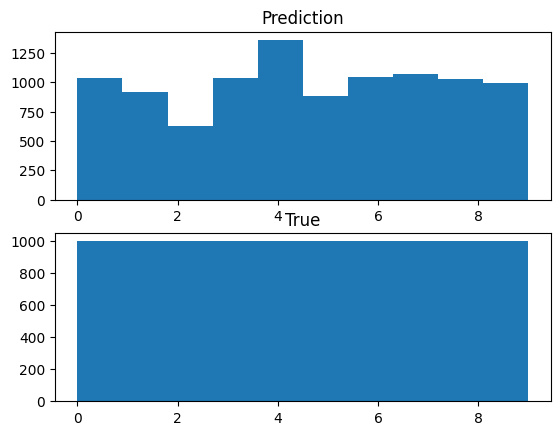

In [9]:
fig, ax = plt.subplots(2, 1)

ax[0].hist(y_pred.reshape(-1, ))
ax[0].title.set_text("Prediction")

ax[1].hist(y_test.reshape(-1, ))
ax[1].title.set_text("True")

In [10]:
prediction.shape

(10000, 10)